## Library

In [4963]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from copy import copy
from scipy import stats
from pprint import pprint

exec(open('library.py').read())
print('Loaded')

Loaded
Loaded


## Variables (customize these)

In [4964]:
# Customize these!!!

# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 1000)
CURRENT_YEAR = 2022                               # What year to start the run on? (default: 2022)
MAX_YEAR = 2222                                   # What year to end the run on? (default: 2100)
USE_NUMBERS = 'Wildeford'                         # Which variable set (see below) to use?
GRAPH_P = 50                                      # What percentile to graph on the graphs below? (default: 50)


# Variable sets - definitely change these!
if USE_NUMBERS == 'Cotra2020':
    initial_gdp = 21 * trillion                    # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 21.3 trillion)
    
    f = 6; g = 1
    tai_flop_size = weighted_lognorm([[25-f,35+f+g], # Lifetime anchor
                                      [26-f,41+f+g], # Small NN anchor
                                      [28-f,40+f+g], # Genome anchor
                                      [28-f,44+f+g], # Medium NN anchor
                                      [30-f,47+f+g], # Long NN anchor
                                      [34-f,47+f+g], # Evolution anchor
                                      [4,185]],      # No path anchor
                                     [0.05,0.2,0.1,0.3,0.15,0.1,0.1]) # Relative weights
    # 90% CI, it takes 10^X FLOPs to run a transformative AI at inference.
    # Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day,
    # or a total of about 10^20 operations
    
    algo_doubling_rate = norm(2.5, 2.5)            # 90% CI, algorithms get twice as efficient every X years
    min_reduction = norm(2, 2)                     # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    max_reduction = norm(5, 5)                     # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    initial_flops_per_dollar = norm(17, 17)        # 90% CI, as of today, we can buy 10^X FLOPs per $
    flops_halving_rate = norm(2.6, 3)              # 90% CI, the cost of FLOPs per $ halves every X years
    max_flops_per_dollar = norm(24, 24)            # 90% CI, the cheapest FLOPs will get is 10^X FLOPs per $
    initial_pay = norm(8.7, 8.7)                   # 90% CI, as of today the maximum we would pay for TAI is $10^X
    gdp_growth = norm(1.03, 1.03)                  # 90% CI, GDP will increase by a factor of X each year
    max_gdp_frac = norm(0.01, 0.01)                # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    p_willingness_ramp = 0                         # What is the probability that, if we were close to TAI, we would suddenly ramp up spending?
    willingness_ramp = norm(1, 1)                  # 90% CI, if we are X% of the spend needed to acheive TAI, we will instantly jump to TAI
    willingness_spend_horizon = 1                  # How many years are we willing to consider spending to make TAI?
    spend_doubling_time = norm(2.5, 2.5)           # 90% CI, our willingness to spend on TAI doubles every X years
    initial_chance_of_nonscaling_issue = 0         # What is the chance there will be a non-scaling issue if TAI is feasible in `CURRENT_YEAR`?
    final_chance_of_nonscaling_issue = 0           # What is the chance there will be a non-scaling issue if TAI is feasible only by `nonscaling_issue_bottom_year` (see below)?
    nonscaling_issue_bottom_year = 0               # What year will will the chance of a non-scaling issue bottom out at (reaching `final_chance_of_nonscaling_issue`)?
    nonscaling_delay = norm(0, 0)                  # 90% CI, conditional on a delay, how many additional years will TAI be delayed due to issues unrelated to scaling to an adequate number of FLOPs (e.g., collecting the relevant training data)?
    base_p_recursive = 0                           # We assume the likelihood of seeing some recursive self-improvement loop increases as we get closer to TAI-level. What is the probability of such a loop at the max?
    recursive_curve_steepness = 0                  # How steep does the probability of recursive self-improvement increase with an increased amount of FLOP relative to the FLOP needed for TAI?
    recursive_curve_inflection = 0                 # How early in the ratio of FLOP present to FLOP needed for TAI does recursive self-improvement start (defining logistic curve)?
    p_recursive_creates_tai_instantly = 0          # If a recursive self-improvement loop is initiated, how likely is it to create full TAI within the year?
    recursive_flops_halving_rate = None            # If a recursive self-improvement loop is initiated, what does the FLOP halving rate become? (Assume now AI are potentially designing chips)
    recursive_algo_doubling_rate = None            # If a recursive self-improvement loop is initiated, what does the algorithm doubling rate become? (Assume now AI are potentially designing algorithms)
    recursive_spend_doubling_time = None           # If a recursive self-improvement loop is initiated, what does our spend doubling time become? (Assume now AIs can potntailly design profitable products) 
    recursive_gdp_growth = None                    # If a recursive self-improvement loop is initiated, what does our GDP growth rate become? (Assume now AIs can potntailly design profitable products)
    recursive_initial_chance_of_nonscaling_issue = None  # If a recursive self-improvement loop is initiated, what does `initial_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)
    recursive_final_chance_of_nonscaling_issue = None    # If a recursive self-improvement loop is initiated, what does `final_chance_of_nonscaling_issue` become? (Assume now AIs can try to solve scaling issues)

elif USE_NUMBERS == 'Cotra2022':
    initial_gdp = 21 * trillion
    
    f = 6; g = 0
    tai_flop_size = weighted_lognorm([[25-f,35+f+g], # Lifetime anchor
                                      [29-f,29+f+g], # GPT-N anchor
                                      [26-f,41+f+g], # Small NN anchor
                                      [28-f,40+f+g], # Genome anchor
                                      [28-f,44+f+g], # Medium NN anchor
                                      [30-f,47+f+g], # Long NN anchor
                                      [34-f,47+f+g], # Evolution anchor
                                      [4,185]],      # No path anchor
                                     [0.05,0.1,0.3,0.1,0.1,0.15,0.1,0.1]) # Relative weights

    algo_doubling_rate = norm(2.5, 2.5)
    min_reduction = norm(2, 2)
    max_reduction = norm(5, 5)
    initial_flops_per_dollar = norm(18, 18)
    flops_halving_rate = norm(2.6, 3)
    max_flops_per_dollar = norm(24, 24)
    initial_pay = norm(8.7, 8.7)
    gdp_growth = norm(1.03, 1.03)
    max_gdp_frac = norm(0.01, 0.01)
    p_willingness_ramp = 0
    willingness_ramp = norm(1, 1)
    willingness_spend_horizon = 1
    spend_doubling_time = norm(2.5, 2.5)
    initial_chance_of_nonscaling_issue = 0
    final_chance_of_nonscaling_issue = 0
    nonscaling_issue_bottom_year = 0
    nonscaling_delay = norm(0, 0)
    base_p_recursive = 0
    recursive_curve_steepness = 0
    recursive_curve_inflection = 0
    p_recursive_creates_tai_instantly = 0
    recursive_flops_halving_rate = None
    recursive_algo_doubling_rate = None
    recursive_spend_doubling_time = None
    recursive_gdp_growth = None
    recursive_initial_chance_of_nonscaling_issue = None
    recursive_final_chance_of_nonscaling_issue = None
    
elif USE_NUMBERS == 'Wildeford':
    initial_gdp = 21 * trillion
    f = 6; g = 0
    tai_flop_size = weighted_lognorm([[26-f,41+f+g], # Small NN anchor
                                      [28-f,44+f+g], # Medium NN anchor
                                      [30-f,47+f+g], # Long NN anchor
                                      [34-f,47+f+g]], # Evolution anchor
                                     [0.5,0.35,0.1,0.05]) # Relative weights
    algo_doubling_rate = norm_lclip(1.5, 5)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    initial_flops_per_dollar = norm(17.5, 18)
    flops_halving_rate = lognorm(2, 5)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = norm(7, 8)
    gdp_growth = norm(1.015, 1.03)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    p_willingness_ramp = 0.1
    willingness_ramp = norm(0.3, 0.9)
    willingness_spend_horizon = 10
    spend_doubling_time = lognorm_lclip(0.5, 3)
    initial_chance_of_nonscaling_issue = 0.9
    final_chance_of_nonscaling_issue = 0.1
    nonscaling_issue_bottom_year = 2060
    nonscaling_delay = lognorm(2, 20)
    base_p_recursive = 0.5
    recursive_curve_steepness = 35
    recursive_curve_inflection = 0.1
    p_recursive_creates_tai_instantly = 0.05
    recursive_flops_halving_rate = lognorm_lclip(0.3, 2)
    recursive_algo_doubling_rate = lognorm_lclip(0.3, 2)
    recursive_spend_doubling_time = lognorm_lclip(0.3, 2)
    recursive_gdp_growth = lognorm_lclip(1.02, 1.1)
    recursive_initial_chance_of_nonscaling_issue = 0.2
    recursive_final_chance_of_nonscaling_issue = 0.01
    
elif USE_NUMBERS == 'Kokotajlo':
    initial_gdp = 21 * trillion
    tai_flop_size = lognorm(22, 39)
    algo_doubling_rate = norm_lclip(1, 3)
    min_reduction = norm(1, 3)
    max_reduction = norm(4, 8)
    initial_flops_per_dollar = norm(17, 17.5)
    flops_halving_rate = norm_lclip(1, 3)
    max_flops_per_dollar = norm(22, 27)
    initial_pay = norm(7, 8)
    gdp_growth = norm(1.015, 1.03)
    max_gdp_frac = lognorm_lclip(0.00006, 0.002)
    p_willingness_ramp = 1
    willingness_ramp = norm(0.1, 0.1)
    willingness_spend_horizon = 1
    spend_doubling_time = lognorm_lclip(0.5, 2)
    initial_chance_of_nonscaling_issue = 0
    final_chance_of_nonscaling_issue = 0
    nonscaling_issue_bottom_year = 2060
    nonscaling_delay = lognorm(1, 20)
    base_p_recursive = 0.5
    recursive_curve_steepness = 35
    recursive_curve_inflection = 0.1
    p_recursive_creates_tai_instantly = 0.05
    recursive_flops_halving_rate = lognorm_lclip(0.3, 2)
    recursive_algo_doubling_rate = lognorm_lclip(0.3, 2)
    recursive_spend_doubling_time = lognorm_lclip(0.3, 2)
    recursive_gdp_growth = lognorm_lclip(1.02, 1.1)
    recursive_initial_chance_of_nonscaling_issue = 0.2
    recursive_final_chance_of_nonscaling_issue = 0.01
    
else:
    raise ValueError


# These equations define how variables change over time or in relationship to other variables.
def gdp(initial_gdp, gdp_growth, year):
    return initial_gdp * (gdp_growth ** year)

def willingness_to_pay(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac, year):
    gdp_ = gdp(initial_gdp=initial_gdp, gdp_growth=gdp_growth, year=year)
    x = (np.log(2) / spend_doubling_time) * year
    if x < 700:
        y = math.log10(initial_pay) + math.log10(math.exp(x)) - math.log10(1 + initial_pay / (gdp_ * max_gdp_frac) * math.exp(x))
        if y > 300:
            y = int(y) # Handle overflow errors
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_pay) + (year/spend_doubling_time)/3.3)

def possible_algo_reduction_fn(min_reduction, max_reduction, tai_flop_size):
    return min(max(min_reduction + round((tai_flop_size - 32) / 4), min_reduction), max_reduction)

def flops_needed(initial_flops, possible_reduction, doubling_rate, year):
    x = (np.log(2) / doubling_rate) * year
    if x < 700:
        y = (math.log10(initial_flops) - max(math.log10(math.exp(x)) - math.log10(1 + (1/possible_reduction) * math.exp(x)), 0))
        if y > 300:
            y = int(y) # Handle overflow errors        
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops) - (1/possible_reduction))

def flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, halving_rate, year):
    x = (np.log(2) / halving_rate) * year
    if x < 700:
        y = (math.log10(initial_flops_per_dollar) + math.log10(math.exp(x)) - math.log10(1 + initial_flops_per_dollar / max_flops_per_dollar * math.exp(x)))
        if y > 300:
            y = int(y) # Handle overflow errors                
        return 10 ** y
    else: # Handle math.exp and math.log10 overflow errors
        return 10 ** int(math.log10(initial_flops_per_dollar) + (year/halving_rate)/3.3)

def cost_of_tai(initial_flops, possible_reduction, algo_doubling_rate, initial_flops_per_dollar, max_flops_per_dollar,
                flops_halving_rate, year):
    return (flops_needed(initial_flops, possible_reduction, algo_doubling_rate, year) /
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def flops_at_max(initial_gdp, gdp_growth, initial_pay, spend_doubling_time, max_gdp_frac,
                 initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year):
    return (willingness_to_pay(initial_gdp=initial_gdp,
                               gdp_growth=gdp_growth,
                               initial_pay=initial_pay,
                               spend_doubling_time=spend_doubling_time,
                               max_gdp_frac=0.01,
                               year=year) *
            flops_per_dollar(initial_flops_per_dollar, max_flops_per_dollar, flops_halving_rate, year))

def p_nonscaling_delay(initial_p, final_p, year, max_year):
    initial_p = initial_p - final_p
    p_ = initial_p - (initial_p * ((year - CURRENT_YEAR) / (max_year - CURRENT_YEAR))) + final_p
    return final_p if p_ < final_p else p_

def p_rapid_recursive_self_improvement(flops_needed_for_tai, flops_we_have, base_p, curve_steepness, curve_inflection):
    if flops_we_have > 10 ** 250:
        return base_p  # Handle overflow error
    if flops_needed_for_tai > 10 ** 250:
        ratio = int(flops_we_have) // int(flops_needed_for_tai)
    else:
        ratio = flops_we_have / flops_needed_for_tai 
    return base_p / (1 + math.exp(-curve_steepness * (ratio - curve_inflection)))

    
# ------------- Ignore below here ------------
years = list(range(CURRENT_YEAR, MAX_YEAR))
print('Loaded')


Loaded


In [4965]:
initial_flops_p = get_percentiles([sample(tai_flop_size) for s in range(1000)], reverse=True)
initial_flops_p

{95: 25.584793434336063,
 90: 27.307824106237796,
 80: 29.336197536508088,
 70: 30.7447888002792,
 60: 31.88707387806384,
 50: 33.215808472352585,
 40: 34.53482724264324,
 30: 36.0801643502877,
 20: 37.44731089714133,
 10: 40.46005265523975,
 5: 43.031235577213096}

In [4966]:
min_reduction_p = get_percentiles([sample(min_reduction) for s in range(1000)], reverse=True)
min_reduction_p

{95: 1.0513007307783138,
 90: 1.241121285411452,
 80: 1.5300062787696478,
 70: 1.7133972934871788,
 60: 1.859795524843748,
 50: 2.011139282544303,
 40: 2.1582838158475184,
 30: 2.3285888097491365,
 20: 2.5065123062414596,
 10: 2.756386552081987,
 5: 2.9626374232776174}

In [4967]:
max_reduction_p = get_percentiles([sample(max_reduction) for s in range(1000)], reverse=True)
max_reduction_p

{95: 3.928325487085088,
 90: 4.354781125340648,
 80: 4.962714039512588,
 70: 5.337458089283217,
 60: 5.679468574609118,
 50: 6.0008546956860656,
 40: 6.318011072655551,
 30: 6.634784176415908,
 20: 6.996744772439113,
 10: 7.5670468438495195,
 5: 7.968046316781108}

In [4968]:
algo_doubling_rate_p = get_percentiles([sample(algo_doubling_rate) for s in range(1000)], reverse=True)
algo_doubling_rate_p

{95: 1.6160539396965057,
 90: 1.9378156960835609,
 80: 2.3699510579997742,
 70: 2.6867022932920426,
 60: 3.0329446698100337,
 50: 3.2654355923352085,
 40: 3.579194672769501,
 30: 3.8494014611332825,
 20: 4.175064720019056,
 10: 4.670351402976695,
 5: 5.023698120818256}

In [4969]:
initial_flops_per_dollar_p = get_percentiles([sample(initial_flops_per_dollar) for s in range(1000)])
initial_flops_per_dollar_p

{5: 17.501932085427843,
 10: 17.555435499314676,
 20: 17.624285835915035,
 30: 17.671178868055833,
 40: 17.709633550791228,
 50: 17.748248946973646,
 60: 17.790319272106213,
 70: 17.836288631503418,
 80: 17.881660436783246,
 90: 17.96161690960313,
 95: 18.018756241802382}

In [4970]:
flops_halving_rate_p = get_percentiles([sample(flops_halving_rate) for s in range(1000)], reverse=True)
flops_halving_rate_p

{95: 1.9672512394759134,
 90: 2.2162799830162476,
 80: 2.4826692166796187,
 70: 2.70403439446858,
 60: 2.9436513289653163,
 50: 3.1397385037782333,
 40: 3.3440270744071743,
 30: 3.5488658341797983,
 20: 3.9165704997840667,
 10: 4.375329071377773,
 5: 4.867798423580347}

In [4971]:
max_flops_per_dollar_p = get_percentiles([sample(max_flops_per_dollar) for s in range(1000)])
max_flops_per_dollar_p

{5: 22.110223579994372,
 10: 22.669453610556296,
 20: 23.23320130930655,
 30: 23.692415610685092,
 40: 24.176883508811287,
 50: 24.577150874808954,
 60: 25.007633694522074,
 70: 25.37142979769923,
 80: 25.833435666327304,
 90: 26.535207689474642,
 95: 27.033300828872388}

In [4972]:
initial_pay_p = get_percentiles([sample(initial_pay) for s in range(1000)])
initial_pay_p

{5: 7.0171760844740625,
 10: 7.102488436843034,
 20: 7.268578864852345,
 30: 7.356818544017952,
 40: 7.42662233570377,
 50: 7.523591875526253,
 60: 7.595439944210148,
 70: 7.673241329434808,
 80: 7.754612033812428,
 90: 7.873732884362173,
 95: 7.984178905986231}

In [4973]:
gdp_growth_p = get_percentiles([sample(gdp_growth) for s in range(1000)])
gdp_growth_p

{5: 1.0156935351921081,
 10: 1.0169256182974578,
 20: 1.0188504344106746,
 30: 1.0200229830848475,
 40: 1.0213345583053506,
 50: 1.0224976114925903,
 60: 1.023512843618576,
 70: 1.024779405351132,
 80: 1.0263485753826889,
 90: 1.0282770479077001,
 95: 1.030102587985659}

In [4974]:
max_gdp_frac_p = get_percentiles([sample(max_gdp_frac) for s in range(1000)])
max_gdp_frac_p

{5: 6.18275591056219e-05,
 10: 9.245274332280946e-05,
 20: 0.0001432386157537267,
 30: 0.00020235894030456642,
 40: 0.000263229131111,
 50: 0.00035662741921198727,
 60: 0.0004563794778267913,
 70: 0.0005988912455361047,
 80: 0.0008259592065384644,
 90: 0.0013107046495140912,
 95: 0.001983092017809292}

In [4975]:
willingness_ramp_p = get_percentiles([sample(willingness_ramp) for s in range(1000)])
willingness_ramp_p

{5: 0.3049420312088368,
 10: 0.3591753156182178,
 20: 0.4426323282513718,
 30: 0.5061008463163815,
 40: 0.553375624968524,
 50: 0.6017211818439799,
 60: 0.6480722651243183,
 70: 0.7039305559864119,
 80: 0.7660935066408527,
 90: 0.8440916887061511,
 95: 0.8992374750191318}

In [4976]:
spend_doubling_time_p = get_percentiles([sample(spend_doubling_time) for s in range(1000)], reverse=True)
spend_doubling_time_p

{95: 0.5194810509108857,
 90: 0.6051402925344026,
 80: 0.7443485862329758,
 70: 0.8869469102011497,
 60: 1.040623624529223,
 50: 1.1800479377857012,
 40: 1.3639108977582848,
 30: 1.5991125868345395,
 20: 1.8430765160770364,
 10: 2.398366380367002,
 5: 3.0059212688012398}

In [4977]:
nonscaling_delay_p = get_percentiles([sample(nonscaling_delay) for s in range(1000)], reverse=True)
nonscaling_delay_p

{95: 2.0769142045007554,
 90: 2.661767814789072,
 80: 3.6010296739992724,
 70: 4.289575252187715,
 60: 5.1842184072940025,
 50: 6.303575596718295,
 40: 7.538457140058594,
 30: 9.434356010153085,
 20: 11.532914222517707,
 10: 15.746256698339737,
 5: 20.600447122282077}

In [4978]:
if recursive_flops_halving_rate:
    recursive_flops_halving_rate_ = get_percentiles([sample(recursive_flops_halving_rate) for s in range(1000)])
    pprint(recursive_flops_halving_rate_)
else:
    print('N/A')


{5: 0.305982640829487,
 10: 0.3748239132855032,
 20: 0.48483394105638616,
 30: 0.5902272183279877,
 40: 0.689532930780867,
 50: 0.7699563885781997,
 60: 0.89122423869708,
 70: 1.0431611357821398,
 80: 1.2573084561702865,
 90: 1.5978462080810873,
 95: 1.9439730156134885}


In [4979]:
if recursive_algo_doubling_rate:
    recursive_algo_doubling_rate_ = get_percentiles([sample(recursive_algo_doubling_rate) for s in range(1000)])
    pprint(recursive_algo_doubling_rate_)
else:
    print('N/A')
    

{5: 0.3,
 10: 0.35859266699944725,
 20: 0.4660570117842303,
 30: 0.5693812489625513,
 40: 0.6760011083268201,
 50: 0.7967654586599848,
 60: 0.9181048582778584,
 70: 1.0683784664951919,
 80: 1.265204071533032,
 90: 1.567270479852321,
 95: 1.9367089358246994}


In [4980]:
if recursive_spend_doubling_time:
    recursive_spend_doubling_time_ = get_percentiles([sample(recursive_spend_doubling_time) for s in range(1000)])
    pprint(recursive_spend_doubling_time_)
else:
    print('N/A')


{5: 0.3,
 10: 0.369062289051898,
 20: 0.45067556810425696,
 30: 0.5406764076626636,
 40: 0.6432318498992481,
 50: 0.7504392774726527,
 60: 0.8862414837623797,
 70: 1.0667245525925937,
 80: 1.2714457304453548,
 90: 1.6810318480535051,
 95: 2.0928962976632}


In [4981]:
if recursive_gdp_growth:
    recursive_gdp_growth_ = get_percentiles([sample(recursive_gdp_growth) for s in range(1000)])
    pprint(recursive_gdp_growth_)
else:
    print('N/A')
    

{5: 1.02,
 10: 1.0273744034078671,
 20: 1.0381834608671738,
 30: 1.0465215562985137,
 40: 1.053325874197377,
 50: 1.058479687172168,
 60: 1.0647392166446699,
 70: 1.070881304939692,
 80: 1.078702545191969,
 90: 1.0891752552569123,
 95: 1.0977484152734005}


## GDP Over Time

Text(0, 0.5, 'log GDP')

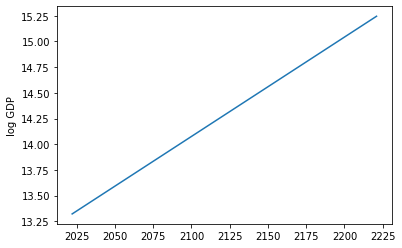

In [4982]:
gdp_ = np.array([gdp(initial_gdp=initial_gdp,
                     gdp_growth=gdp_growth_p[GRAPH_P],
                     year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(gdp_))
plt.ylabel('log GDP')

In [4983]:
for y in years:
    print('Year: {} - GDP log$ {} (~{})'.format(y,
                                                np.round(np.log10(gdp_[y - CURRENT_YEAR]), 1),
                                                numerize(np.log10(gdp_[y - CURRENT_YEAR]))))
    

Year: 2022 - GDP log$ 13.3 (~10 trillion)
Year: 2023 - GDP log$ 13.3 (~10 trillion)
Year: 2024 - GDP log$ 13.3 (~10 trillion)
Year: 2025 - GDP log$ 13.4 (~10 trillion)
Year: 2026 - GDP log$ 13.4 (~10 trillion)
Year: 2027 - GDP log$ 13.4 (~10 trillion)
Year: 2028 - GDP log$ 13.4 (~10 trillion)
Year: 2029 - GDP log$ 13.4 (~10 trillion)
Year: 2030 - GDP log$ 13.4 (~10 trillion)
Year: 2031 - GDP log$ 13.4 (~10 trillion)
Year: 2032 - GDP log$ 13.4 (~10 trillion)
Year: 2033 - GDP log$ 13.4 (~10 trillion)
Year: 2034 - GDP log$ 13.4 (~10 trillion)
Year: 2035 - GDP log$ 13.4 (~10 trillion)
Year: 2036 - GDP log$ 13.5 (~10 trillion)
Year: 2037 - GDP log$ 13.5 (~10 trillion)
Year: 2038 - GDP log$ 13.5 (~10 trillion)
Year: 2039 - GDP log$ 13.5 (~10 trillion)
Year: 2040 - GDP log$ 13.5 (~10 trillion)
Year: 2041 - GDP log$ 13.5 (~10 trillion)
Year: 2042 - GDP log$ 13.5 (~10 trillion)
Year: 2043 - GDP log$ 13.5 (~10 trillion)
Year: 2044 - GDP log$ 13.5 (~10 trillion)
Year: 2045 - GDP log$ 13.5 (~10 tr

## Willingness to Pay Over Time

Text(0, 0.5, 'log $ willing to spend on TAI')

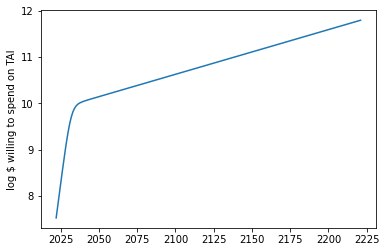

In [4984]:
willingness = np.array([willingness_to_pay(initial_gdp=initial_gdp,
                                           gdp_growth=gdp_growth_p[GRAPH_P],
                                           initial_pay=10 ** initial_pay_p[GRAPH_P],
                                           spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                           max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                           year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(willingness))
plt.ylabel('log $ willing to spend on TAI')


In [4985]:
for y in years:
    print('Year: {} - willingness log$ {} (~{})'.format(y,
                                                        np.round(np.log10(willingness[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(willingness[y - CURRENT_YEAR]))))

Year: 2022 - willingness log$ 7.5 (~10 million)
Year: 2023 - willingness log$ 7.8 (~10 million)
Year: 2024 - willingness log$ 8.0 (~100 million)
Year: 2025 - willingness log$ 8.3 (~100 million)
Year: 2026 - willingness log$ 8.5 (~100 million)
Year: 2027 - willingness log$ 8.8 (~100 million)
Year: 2028 - willingness log$ 9.0 (~one billion)
Year: 2029 - willingness log$ 9.2 (~one billion)
Year: 2030 - willingness log$ 9.4 (~one billion)
Year: 2031 - willingness log$ 9.6 (~one billion)
Year: 2032 - willingness log$ 9.7 (~one billion)
Year: 2033 - willingness log$ 9.8 (~one billion)
Year: 2034 - willingness log$ 9.9 (~one billion)
Year: 2035 - willingness log$ 9.9 (~one billion)
Year: 2036 - willingness log$ 10.0 (~one billion)
Year: 2037 - willingness log$ 10.0 (~one billion)
Year: 2038 - willingness log$ 10.0 (~10 billion)
Year: 2039 - willingness log$ 10.0 (~10 billion)
Year: 2040 - willingness log$ 10.0 (~10 billion)
Year: 2041 - willingness log$ 10.1 (~10 billion)
Year: 2042 - willing

## FLOPs Needed to Make TAI (Given Algorithmic Progress)

Text(0, 0.5, 'log FLOPs needed to make TAI')

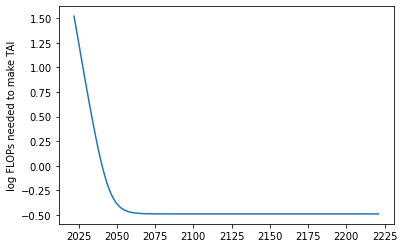

In [4986]:
flops_ = np.array([flops_needed(initial_flops=initial_flops_p[GRAPH_P],
                                doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_))
plt.ylabel('log FLOPs needed to make TAI')


In [4987]:
for y in years:
    print('Year: {} - log FLOPs needed for TAI {} (~{})'.format(y,
                                                                np.round(np.log10(flops_[y - CURRENT_YEAR]), 1),
                                                                numerize(np.log10(flops_[y - CURRENT_YEAR]))))

Year: 2022 - log FLOPs needed for TAI 1.5 (~ten)
Year: 2023 - log FLOPs needed for TAI 1.4 (~ten)
Year: 2024 - log FLOPs needed for TAI 1.3 (~ten)
Year: 2025 - log FLOPs needed for TAI 1.3 (~ten)
Year: 2026 - log FLOPs needed for TAI 1.2 (~ten)
Year: 2027 - log FLOPs needed for TAI 1.1 (~ten)
Year: 2028 - log FLOPs needed for TAI 1.0 (~one)
Year: 2029 - log FLOPs needed for TAI 0.9 (~one)
Year: 2030 - log FLOPs needed for TAI 0.8 (~one)
Year: 2031 - log FLOPs needed for TAI 0.7 (~one)
Year: 2032 - log FLOPs needed for TAI 0.6 (~one)
Year: 2033 - log FLOPs needed for TAI 0.5 (~one)
Year: 2034 - log FLOPs needed for TAI 0.5 (~one)
Year: 2035 - log FLOPs needed for TAI 0.4 (~one)
Year: 2036 - log FLOPs needed for TAI 0.3 (~one)
Year: 2037 - log FLOPs needed for TAI 0.2 (~one)
Year: 2038 - log FLOPs needed for TAI 0.2 (~one)
Year: 2039 - log FLOPs needed for TAI 0.1 (~one)
Year: 2040 - log FLOPs needed for TAI 0.0 (~one)
Year: 2041 - log FLOPs needed for TAI -0.0 (~one)
Year: 2042 - log FL

## FLOPs per Dollar (Given Declining Costs)

Text(0, 0.5, 'log FLOPs per $1')

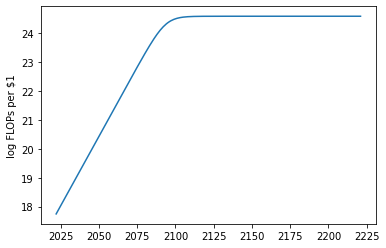

In [4988]:
flops_per_dollar_ = np.array([flops_per_dollar(initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                               max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                               halving_rate=flops_halving_rate_p[GRAPH_P],
                                               year=(y - CURRENT_YEAR)) for y in years])
plt.plot(years, np.log10(flops_per_dollar_))
plt.ylabel('log FLOPs per $1')


In [4989]:
for y in years:
    print('Year: {} - log {} FLOPs per $ (~{})'.format(y,
                                                       np.round(np.log10(flops_per_dollar_[y - CURRENT_YEAR]), 1),
                                                       numerize(np.log10(flops_per_dollar_[y - CURRENT_YEAR]))))

Year: 2022 - log 17.7 FLOPs per $ (~100 quadrillion)
Year: 2023 - log 17.8 FLOPs per $ (~100 quadrillion)
Year: 2024 - log 17.9 FLOPs per $ (~100 quadrillion)
Year: 2025 - log 18.0 FLOPs per $ (~one quintillion)
Year: 2026 - log 18.1 FLOPs per $ (~one quintillion)
Year: 2027 - log 18.2 FLOPs per $ (~one quintillion)
Year: 2028 - log 18.3 FLOPs per $ (~one quintillion)
Year: 2029 - log 18.4 FLOPs per $ (~one quintillion)
Year: 2030 - log 18.5 FLOPs per $ (~one quintillion)
Year: 2031 - log 18.6 FLOPs per $ (~one quintillion)
Year: 2032 - log 18.7 FLOPs per $ (~one quintillion)
Year: 2033 - log 18.8 FLOPs per $ (~one quintillion)
Year: 2034 - log 18.9 FLOPs per $ (~one quintillion)
Year: 2035 - log 19.0 FLOPs per $ (~one quintillion)
Year: 2036 - log 19.1 FLOPs per $ (~10 quintillion)
Year: 2037 - log 19.2 FLOPs per $ (~10 quintillion)
Year: 2038 - log 19.3 FLOPs per $ (~10 quintillion)
Year: 2039 - log 19.4 FLOPs per $ (~10 quintillion)
Year: 2040 - log 19.5 FLOPs per $ (~10 quintillion

## Max Possible OOM Reduction in TAI FLOP Size

Text(0.5, 0, 'initial FLOP needed for TAI prior to any reduction')

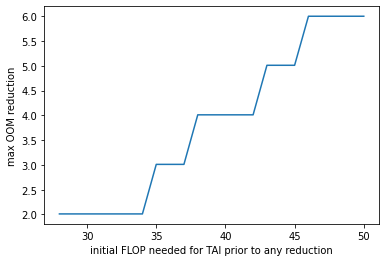

In [4990]:
tai_sizes = range(28, 51)
flops_per_dollar_ = np.array([possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], t) for t in tai_sizes])
plt.plot(tai_sizes, flops_per_dollar_)
plt.ylabel('max OOM reduction')
plt.xlabel('initial FLOP needed for TAI prior to any reduction')

In [4991]:
for t in tai_sizes:
    print('TAI log FLOP {} -> {} OOM reductions possible'.format(t,
                                                                 round(possible_algo_reduction_fn(min_reduction_p[GRAPH_P],
                                                                                                  max_reduction_p[GRAPH_P],
                                                                                                  t), 2)))
          

TAI log FLOP 28 -> 2.01 OOM reductions possible
TAI log FLOP 29 -> 2.01 OOM reductions possible
TAI log FLOP 30 -> 2.01 OOM reductions possible
TAI log FLOP 31 -> 2.01 OOM reductions possible
TAI log FLOP 32 -> 2.01 OOM reductions possible
TAI log FLOP 33 -> 2.01 OOM reductions possible
TAI log FLOP 34 -> 2.01 OOM reductions possible
TAI log FLOP 35 -> 3.01 OOM reductions possible
TAI log FLOP 36 -> 3.01 OOM reductions possible
TAI log FLOP 37 -> 3.01 OOM reductions possible
TAI log FLOP 38 -> 4.01 OOM reductions possible
TAI log FLOP 39 -> 4.01 OOM reductions possible
TAI log FLOP 40 -> 4.01 OOM reductions possible
TAI log FLOP 41 -> 4.01 OOM reductions possible
TAI log FLOP 42 -> 4.01 OOM reductions possible
TAI log FLOP 43 -> 5.01 OOM reductions possible
TAI log FLOP 44 -> 5.01 OOM reductions possible
TAI log FLOP 45 -> 5.01 OOM reductions possible
TAI log FLOP 46 -> 6.0 OOM reductions possible
TAI log FLOP 47 -> 6.0 OOM reductions possible
TAI log FLOP 48 -> 6.0 OOM reductions poss

## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP)

Text(0, 0.5, 'log $ needed to buy TAI')

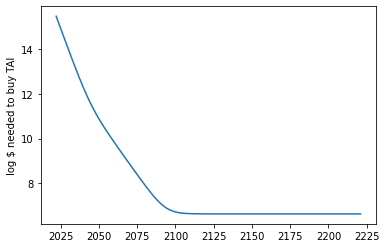

In [4992]:
cost_of_tai_ = np.array([cost_of_tai(initial_flops=10 ** initial_flops_p[GRAPH_P],
                                     possible_reduction=10 ** possible_algo_reduction_fn(min_reduction_p[GRAPH_P], max_reduction_p[GRAPH_P], initial_flops_p[GRAPH_P]),
                                     algo_doubling_rate=algo_doubling_rate_p[GRAPH_P],
                                     initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                     max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                     flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                     year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(cost_of_tai_))
plt.ylabel('log $ needed to buy TAI')


In [4993]:
for y in years:
    print('Year: {} - log $ {} to buy TAI (~{})'.format(y,
                                                        np.round(np.log10(cost_of_tai_[y - CURRENT_YEAR]), 1),
                                                        numerize(np.log10(cost_of_tai_[y - CURRENT_YEAR]))))

Year: 2022 - log $ 15.5 to buy TAI (~one quadrillion)
Year: 2023 - log $ 15.3 to buy TAI (~one quadrillion)
Year: 2024 - log $ 15.1 to buy TAI (~one quadrillion)
Year: 2025 - log $ 14.9 to buy TAI (~100 trillion)
Year: 2026 - log $ 14.7 to buy TAI (~100 trillion)
Year: 2027 - log $ 14.5 to buy TAI (~100 trillion)
Year: 2028 - log $ 14.4 to buy TAI (~100 trillion)
Year: 2029 - log $ 14.2 to buy TAI (~100 trillion)
Year: 2030 - log $ 14.0 to buy TAI (~10 trillion)
Year: 2031 - log $ 13.8 to buy TAI (~10 trillion)
Year: 2032 - log $ 13.6 to buy TAI (~10 trillion)
Year: 2033 - log $ 13.4 to buy TAI (~10 trillion)
Year: 2034 - log $ 13.3 to buy TAI (~10 trillion)
Year: 2035 - log $ 13.1 to buy TAI (~10 trillion)
Year: 2036 - log $ 12.9 to buy TAI (~one trillion)
Year: 2037 - log $ 12.7 to buy TAI (~one trillion)
Year: 2038 - log $ 12.6 to buy TAI (~one trillion)
Year: 2039 - log $ 12.4 to buy TAI (~one trillion)
Year: 2040 - log $ 12.2 to buy TAI (~one trillion)
Year: 2041 - log $ 12.1 to b

## FLOPs at Max Spend

Text(0, 0.5, 'max log FLOPs bought given willingness to spend')

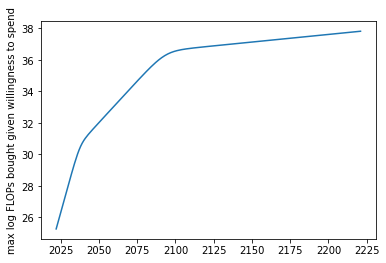

In [4994]:
flops_at_max_ = np.array([flops_at_max(initial_gdp=initial_gdp,
                                       gdp_growth=gdp_growth_p[GRAPH_P],
                                       initial_pay=10 ** initial_pay_p[GRAPH_P],
                                       spend_doubling_time=spend_doubling_time_p[GRAPH_P],
                                       max_gdp_frac=max_gdp_frac_p[GRAPH_P],
                                       initial_flops_per_dollar=10 ** initial_flops_per_dollar_p[GRAPH_P],
                                       max_flops_per_dollar=10 ** max_flops_per_dollar_p[GRAPH_P],
                                       flops_halving_rate=flops_halving_rate_p[GRAPH_P],
                                       year=(y - CURRENT_YEAR)) for y in years])

plt.plot(years, np.log10(flops_at_max_))
plt.ylabel('max log FLOPs bought given willingness to spend')


In [4995]:
for y in years:
    print('Year: {} - max log FLOPs {} (~{})'.format(y,
                                                     np.round(np.log10(flops_at_max_[y - CURRENT_YEAR]), 1),
                                                     numerize(np.log10(flops_at_max_[y - CURRENT_YEAR]))))

Year: 2022 - max log FLOPs 25.3 (~10 septillion)
Year: 2023 - max log FLOPs 25.6 (~10 septillion)
Year: 2024 - max log FLOPs 26.0 (~10 septillion)
Year: 2025 - max log FLOPs 26.3 (~100 septillion)
Year: 2026 - max log FLOPs 26.7 (~100 septillion)
Year: 2027 - max log FLOPs 27.0 (~one octillion)
Year: 2028 - max log FLOPs 27.4 (~one octillion)
Year: 2029 - max log FLOPs 27.7 (~one octillion)
Year: 2030 - max log FLOPs 28.1 (~10 octillion)
Year: 2031 - max log FLOPs 28.4 (~10 octillion)
Year: 2032 - max log FLOPs 28.8 (~10 octillion)
Year: 2033 - max log FLOPs 29.1 (~100 octillion)
Year: 2034 - max log FLOPs 29.4 (~100 octillion)
Year: 2035 - max log FLOPs 29.7 (~100 octillion)
Year: 2036 - max log FLOPs 30.0 (~one nonillion)
Year: 2037 - max log FLOPs 30.3 (~one nonillion)
Year: 2038 - max log FLOPs 30.5 (~one nonillion)
Year: 2039 - max log FLOPs 30.7 (~one nonillion)
Year: 2040 - max log FLOPs 30.9 (~one nonillion)
Year: 2041 - max log FLOPs 31.0 (~10 nonillion)
Year: 2042 - max log F

## Chance of Non-scaling Delay

Text(0, 0.5, 'chance of non-scaling delay by year')

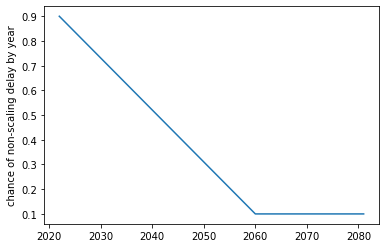

In [4996]:
p_nonscaling_delay_ = np.array([p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                   final_chance_of_nonscaling_issue,
                                                   year=y,
                                                   max_year=nonscaling_issue_bottom_year) for y in years])

plt.plot(years[:60], p_nonscaling_delay_[:60])
plt.ylabel('chance of non-scaling delay by year')
# TODO: Make logistic?

In [4997]:
for y in years:
    print('Year: {} - p(nonscaling delay) = {}%'.format(y,
                                                        np.round(p_nonscaling_delay_[y - CURRENT_YEAR] * 100, 1)))

Year: 2022 - p(nonscaling delay) = 90.0%
Year: 2023 - p(nonscaling delay) = 87.9%
Year: 2024 - p(nonscaling delay) = 85.8%
Year: 2025 - p(nonscaling delay) = 83.7%
Year: 2026 - p(nonscaling delay) = 81.6%
Year: 2027 - p(nonscaling delay) = 79.5%
Year: 2028 - p(nonscaling delay) = 77.4%
Year: 2029 - p(nonscaling delay) = 75.3%
Year: 2030 - p(nonscaling delay) = 73.2%
Year: 2031 - p(nonscaling delay) = 71.1%
Year: 2032 - p(nonscaling delay) = 68.9%
Year: 2033 - p(nonscaling delay) = 66.8%
Year: 2034 - p(nonscaling delay) = 64.7%
Year: 2035 - p(nonscaling delay) = 62.6%
Year: 2036 - p(nonscaling delay) = 60.5%
Year: 2037 - p(nonscaling delay) = 58.4%
Year: 2038 - p(nonscaling delay) = 56.3%
Year: 2039 - p(nonscaling delay) = 54.2%
Year: 2040 - p(nonscaling delay) = 52.1%
Year: 2041 - p(nonscaling delay) = 50.0%
Year: 2042 - p(nonscaling delay) = 47.9%
Year: 2043 - p(nonscaling delay) = 45.8%
Year: 2044 - p(nonscaling delay) = 43.7%
Year: 2045 - p(nonscaling delay) = 41.6%
Year: 2046 - p(n

## Chance of Rapid Recursive Self-Improvement

Text(0.5, 0, 'percentage of TAI-level FLOP')

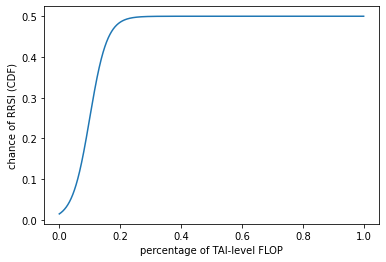

In [4998]:
p_rrsi_ = np.array([p_rapid_recursive_self_improvement(10000,
                                                       x,
                                                       base_p_recursive,
                                                       recursive_curve_steepness,
                                                       recursive_curve_inflection) for x in range(10000)])

plt.plot([r / 10000 for r in range(10000)], p_rrsi_)
plt.ylabel('chance of RRSI (CDF)')
plt.xlabel('percentage of TAI-level FLOP')

In [4999]:
samples = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,
           1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
for i in samples:
    print('Ratio: {} in 10000 - p(RRSI) (CDF) = {}%'.format(i, np.round(p_rrsi_[i-1] * 100, 1)))

Ratio: 1 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 5 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 10 in 10000 - p(RRSI) (CDF) = 1.5%
Ratio: 20 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 30 in 10000 - p(RRSI) (CDF) = 1.6%
Ratio: 40 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 50 in 10000 - p(RRSI) (CDF) = 1.7%
Ratio: 60 in 10000 - p(RRSI) (CDF) = 1.8%
Ratio: 70 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 80 in 10000 - p(RRSI) (CDF) = 1.9%
Ratio: 90 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 100 in 10000 - p(RRSI) (CDF) = 2.0%
Ratio: 200 in 10000 - p(RRSI) (CDF) = 2.9%
Ratio: 300 in 10000 - p(RRSI) (CDF) = 4.0%
Ratio: 400 in 10000 - p(RRSI) (CDF) = 5.4%
Ratio: 500 in 10000 - p(RRSI) (CDF) = 7.4%
Ratio: 600 in 10000 - p(RRSI) (CDF) = 9.9%
Ratio: 700 in 10000 - p(RRSI) (CDF) = 12.9%
Ratio: 800 in 10000 - p(RRSI) (CDF) = 16.6%
Ratio: 900 in 10000 - p(RRSI) (CDF) = 20.6%
Ratio: 1000 in 10000 - p(RRSI) (CDF) = 25.0%
Ratio: 1100 in 10000 - p(RRSI) (CDF) = 29.3%
Ratio: 1200 in 10000 - p(RRSI) (CDF) = 33.4%
Ratio: 1300 in 

## Run Model

Running
## RUN 1/10000 ##
Diagnostic: tai_flop_size=39.15226941132564, nonscaling_delay=8.471365559325395, algo_doubling_rate=3.218462950017751, possible_algo_reduction=4.833157210547288, initial_flops_per_dollar=6.014579798333181e+17, flops_halving_rate=2.384378970560052, max_flops_per_dollar=1.2226921033131787e+25, initial_pay=16788819.910287466, gdp_growth=1.0238787631625432, max_gdp_frac=0.00042970734771761564, willingness_ramp=1, spend_doubling_time=1.2716024922433926
-
It takes 39.2 log FLOPs (~one million decillion) for transformative capabilities.
Every 3.2 years algorithms get 2x better, with 4.8 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.4 years they get 2x cheaper, to a maximum of 25.1 log FLOPs (~10 septillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ramp effe

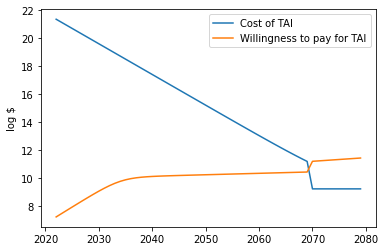

## RUN 2/10000 ##
Diagnostic: tai_flop_size=36.743563172552996, nonscaling_delay=6.98165875731525, algo_doubling_rate=2.554275766520103, possible_algo_reduction=3.925785345054648, initial_flops_per_dollar=3.661083667532113e+17, flops_halving_rate=1.8018998167736295, max_flops_per_dollar=4.771889771847476e+22, initial_pay=17085001.227688786, gdp_growth=1.0222846692768626, max_gdp_frac=0.0007247894710548944, willingness_ramp=0.5536593485043999, spend_doubling_time=1.6790161651499915
-
It takes 36.7 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 2.6 years algorithms get 2x better, with 3.9 log reductions possible.
FLOPs start at a cost of 17.6 log FLOPs (~100 quadrillion) per $. Every 1.8 years they get 2x cheaper, to a maximum of 22.7 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.7x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.022x per year.
In this simulation, if we are 55.0% of the wa

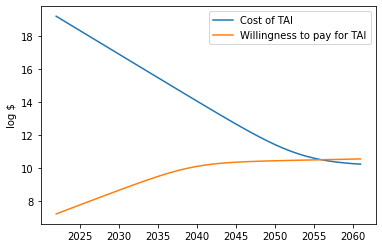

## RUN 3/10000 ##
Diagnostic: tai_flop_size=41.85986651708882, nonscaling_delay=13.902183200589244, algo_doubling_rate=3.0887972159322685, possible_algo_reduction=4.747706687736207, initial_flops_per_dollar=1.3442141320604342e+18, flops_halving_rate=2.3298398736518826, max_flops_per_dollar=5.9175876745095224e+23, initial_pay=13271999.932321072, gdp_growth=1.0168899027087166, max_gdp_frac=0.00023780595537774353, willingness_ramp=1, spend_doubling_time=2.3027277190910094
-
It takes 41.9 log FLOPs (~100 million decillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 4.7 log reductions possible.
FLOPs start at a cost of 18.1 log FLOPs (~one quintillion) per $. Every 2.3 years they get 2x cheaper, to a maximum of 23.8 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 2.3x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects

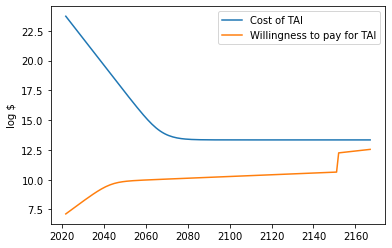

## RUN 4/10000 ##
Diagnostic: tai_flop_size=26.59582661734783, nonscaling_delay=9.171491847130795, algo_doubling_rate=2.8096884524658208, possible_algo_reduction=0, initial_flops_per_dollar=5.3385367500424704e+17, flops_halving_rate=3.123728566749625, max_flops_per_dollar=4.48981517564141e+21, initial_pay=37059627.068905614, gdp_growth=1.0238375017936383, max_gdp_frac=0.0008198675850894042, willingness_ramp=1, spend_doubling_time=0.8774016530371578
-
It takes 26.6 log FLOPs (~100 septillion) for transformative capabilities.
Every 2.8 years algorithms get 2x better, with 0 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 21.7 log FLOPs (~one sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0008% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ramp effects.
We are willing to spend over

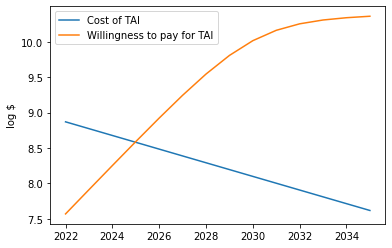

## RUN 5/10000 ##
Diagnostic: tai_flop_size=38.406942119161066, nonscaling_delay=9.651999065943079, algo_doubling_rate=1.5, possible_algo_reduction=4.074738724215714, initial_flops_per_dollar=6.51135499565609e+17, flops_halving_rate=2.855591392762453, max_flops_per_dollar=1.245068439432741e+23, initial_pay=40519864.74491465, gdp_growth=1.0276110106363723, max_gdp_frac=0.0007494078959943875, willingness_ramp=1, spend_doubling_time=2.2223409244276064
-
It takes 38.4 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 4.1 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.9 years they get 2x cheaper, to a maximum of 23.1 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 2.2x per year to a max of 0.0007% of GDP. GDP grows at a rate of 1.028x per year.
In this simulation, there are no willingness ramp effects.
We are willing to 

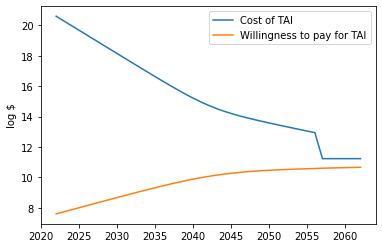

## RUN 6/10000 ##
Diagnostic: tai_flop_size=40.48145263745483, nonscaling_delay=1.6164016769041576, algo_doubling_rate=1.6594844894985095, possible_algo_reduction=4.746200584534014, initial_flops_per_dollar=5.82529797193326e+17, flops_halving_rate=2.2539447409303603, max_flops_per_dollar=4.218602583572467e+25, initial_pay=52549073.41376231, gdp_growth=1.0214980668174187, max_gdp_frac=0.00038406163697508086, willingness_ramp=1, spend_doubling_time=1.7077453543994463
-
It takes 40.5 log FLOPs (~10 million decillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 4.7 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.3 years they get 2x cheaper, to a maximum of 25.6 log FLOPs (~10 septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.7x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.
We a

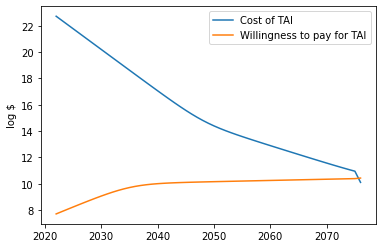

## RUN 7/10000 ##
Diagnostic: tai_flop_size=36.424655887099235, nonscaling_delay=9.266366679393688, algo_doubling_rate=3.6193733742664524, possible_algo_reduction=3.637034542277933, initial_flops_per_dollar=5.208486336786572e+17, flops_halving_rate=3.611743658325499, max_flops_per_dollar=1.3770357070966003e+24, initial_pay=45222357.72274479, gdp_growth=1.0197327005206702, max_gdp_frac=0.0009158860174043174, willingness_ramp=1, spend_doubling_time=1.5767537278925046
-
It takes 36.4 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 3.6 years algorithms get 2x better, with 3.6 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per $. Every 3.6 years they get 2x cheaper, to a maximum of 24.1 log FLOPs (~one septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.6x per year to a max of 0.0009% of GDP. GDP grows at a rate of 1.02x per year.
In this simulation, there are no willingness ramp effects.
We

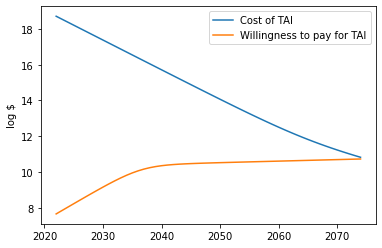

## RUN 8/10000 ##
Diagnostic: tai_flop_size=20.098042107487966, nonscaling_delay=4.40758935354632, algo_doubling_rate=3.854330027520801, possible_algo_reduction=2.192257007879663, initial_flops_per_dollar=1.358196589267072e+18, flops_halving_rate=3.6641656078308213, max_flops_per_dollar=4.867087255276307e+24, initial_pay=27481944.95576574, gdp_growth=1.0249523396755167, max_gdp_frac=0.0004184831132935496, willingness_ramp=1, spend_doubling_time=1.508678911629479
-
It takes 20.1 log FLOPs (~100 quintillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 2.2 log reductions possible.
FLOPs start at a cost of 18.1 log FLOPs (~one quintillion) per $. Every 3.7 years they get 2x cheaper, to a maximum of 24.7 log FLOPs (~one septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.5x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
We are will

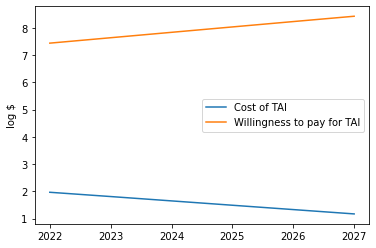

## RUN 9/10000 ##
Diagnostic: tai_flop_size=40.14685538342001, nonscaling_delay=18.227803561719185, algo_doubling_rate=1.992168618190349, possible_algo_reduction=3.7060550456249386, initial_flops_per_dollar=7.012950383346359e+17, flops_halving_rate=3.251556680654868, max_flops_per_dollar=3.707428886800724e+23, initial_pay=34540980.59192734, gdp_growth=1.018697225447131, max_gdp_frac=0.000450612116845581, willingness_ramp=1, spend_doubling_time=2.0883632507187198
-
It takes 40.1 log FLOPs (~10 million decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3.7 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 3.3 years they get 2x cheaper, to a maximum of 23.6 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 2.1x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.019x per year.
In this simulation, there are no willingness ramp effects.
We are

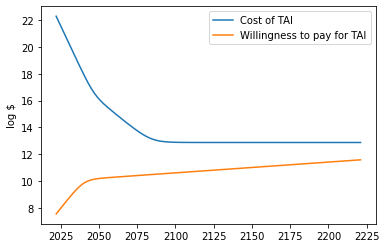

## RUN 10/10000 ##
Diagnostic: tai_flop_size=34.3227064128946, nonscaling_delay=3.7764616384194265, algo_doubling_rate=3.2994544583719865, possible_algo_reduction=2.857176960472222, initial_flops_per_dollar=9.305848529071177e+17, flops_halving_rate=3.939752641585942, max_flops_per_dollar=1.983242476955483e+24, initial_pay=10408610.58519856, gdp_growth=1.0274239547812052, max_gdp_frac=0.001878106815897957, willingness_ramp=1, spend_doubling_time=1.2796216385072456
-
It takes 34.3 log FLOPs (~10 decillion) for transformative capabilities.
Every 3.3 years algorithms get 2x better, with 2.9 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~100 quadrillion) per $. Every 3.9 years they get 2x cheaper, to a maximum of 24.3 log FLOPs (~one septillion) per $.
We are willing to pay 7.0 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0019% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness ramp effects.
We are willin

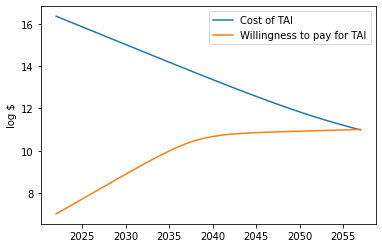

## RUN 11/10000 ##
Diagnostic: tai_flop_size=28.558924906201852, nonscaling_delay=2.472826696932781, algo_doubling_rate=4.180932086724744, possible_algo_reduction=2.5829713493642537, initial_flops_per_dollar=6.973954057381449e+17, flops_halving_rate=3.2929003373757126, max_flops_per_dollar=8.536243539789337e+23, initial_pay=56051694.31931366, gdp_growth=1.0270413400371197, max_gdp_frac=0.0009687282721237266, willingness_ramp=1, spend_doubling_time=1.230115851511724
-
It takes 28.6 log FLOPs (~10 octillion) for transformative capabilities.
Every 4.2 years algorithms get 2x better, with 2.6 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 3.3 years they get 2x cheaper, to a maximum of 23.9 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 1.2x per year to a max of 0.001% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness ramp effects.
We are willi

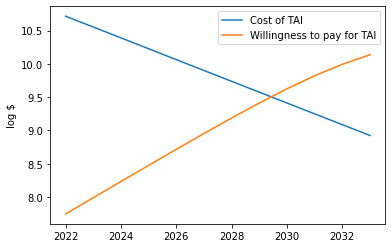

## RUN 12/10000 ##
Diagnostic: tai_flop_size=32.17723692628551, nonscaling_delay=4.737902691653612, algo_doubling_rate=3.349042224010368, possible_algo_reduction=2.5707081059435413, initial_flops_per_dollar=4.0712017107264525e+17, flops_halving_rate=2.510045420831802, max_flops_per_dollar=1.4359819258021983e+26, initial_pay=26967799.181233402, gdp_growth=1.0306344466507649, max_gdp_frac=0.0012760429697735523, willingness_ramp=1, spend_doubling_time=1.2927305351440979
-
It takes 32.2 log FLOPs (~100 nonillion) for transformative capabilities.
Every 3.3 years algorithms get 2x better, with 2.6 log reductions possible.
FLOPs start at a cost of 17.6 log FLOPs (~100 quadrillion) per $. Every 2.5 years they get 2x cheaper, to a maximum of 26.2 log FLOPs (~100 septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0013% of GDP. GDP grows at a rate of 1.031x per year.
In this simulation, there are no willingness ramp effects.
We are w

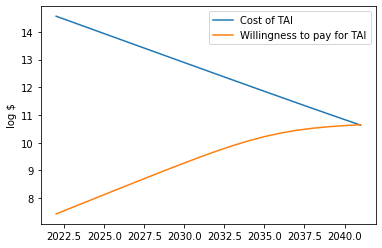

## RUN 13/10000 ##
Diagnostic: tai_flop_size=38.16941542899875, nonscaling_delay=15.001353229791432, algo_doubling_rate=2.131747894826781, possible_algo_reduction=3.0576811881553314, initial_flops_per_dollar=5.905211482552803e+17, flops_halving_rate=2.833316279566448, max_flops_per_dollar=9.517727973156726e+24, initial_pay=21872905.910227038, gdp_growth=1.0253219008840357, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=1.4259765211251252
-
It takes 38.2 log FLOPs (~100 thousand decillion) for transformative capabilities.
Every 2.1 years algorithms get 2x better, with 3.1 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.8 years they get 2x cheaper, to a maximum of 25.0 log FLOPs (~one septillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 1.4x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
We are willing t

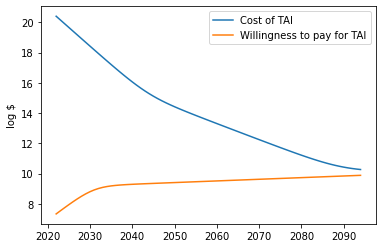

## RUN 14/10000 ##
Diagnostic: tai_flop_size=35.9885881198049, nonscaling_delay=5.164747792310882, algo_doubling_rate=3.6746565604355355, possible_algo_reduction=3.8397907064699885, initial_flops_per_dollar=4.793193093716025e+17, flops_halving_rate=3.594523975448513, max_flops_per_dollar=1.0984855956962585e+22, initial_pay=19407027.964710247, gdp_growth=1.0207765950196737, max_gdp_frac=0.000491636679098477, willingness_ramp=1, spend_doubling_time=1.0754572723344435
-
It takes 36.0 log FLOPs (~100 decillion) for transformative capabilities.
Every 3.7 years algorithms get 2x better, with 3.8 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per $. Every 3.6 years they get 2x cheaper, to a maximum of 22.0 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 1.1x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.
We are will

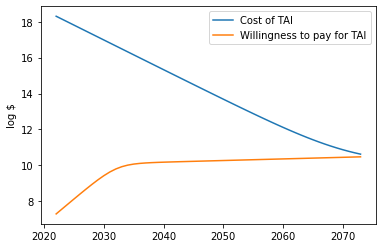

## RUN 15/10000 ##
Diagnostic: tai_flop_size=34.0371736285793, nonscaling_delay=3.5756694972586525, algo_doubling_rate=3.1759992796981273, possible_algo_reduction=2.605347581303712, initial_flops_per_dollar=7.059866127546395e+17, flops_halving_rate=1.5228667220396146, max_flops_per_dollar=1.0250087516073941e+23, initial_pay=13543352.01549558, gdp_growth=1.0256922145533818, max_gdp_frac=0.0009995550731494382, willingness_ramp=1, spend_doubling_time=0.8938700804067333
-
It takes 34.0 log FLOPs (~10 decillion) for transformative capabilities.
Every 3.2 years algorithms get 2x better, with 2.6 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 1.5 years they get 2x cheaper, to a maximum of 23.0 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.1 log $ (~10 million) and this increases by 0.9x per year to a max of 0.001% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willingness ramp effects.
We are will

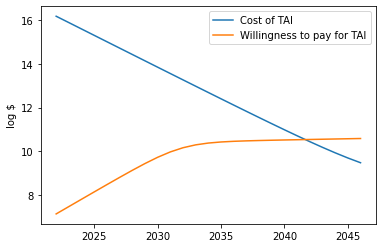

## RUN 16/10000 ##
Diagnostic: tai_flop_size=28.684519591969227, nonscaling_delay=8.214692316067842, algo_doubling_rate=1.687185296264441, possible_algo_reduction=2.0134090983237223, initial_flops_per_dollar=4.6502700089816646e+17, flops_halving_rate=2.7178094834787134, max_flops_per_dollar=1.4545736060979122e+24, initial_pay=33691512.1793791, gdp_growth=1.0262741145033365, max_gdp_frac=0.0001923309429896276, willingness_ramp=1, spend_doubling_time=2.1703508565015674
-
It takes 28.7 log FLOPs (~10 octillion) for transformative capabilities.
Every 1.7 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 24.2 log FLOPs (~one septillion) per $.
We are willing to pay 7.5 log $ (~10 million) and this increases by 2.2x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willingness ramp effects.
We are wi

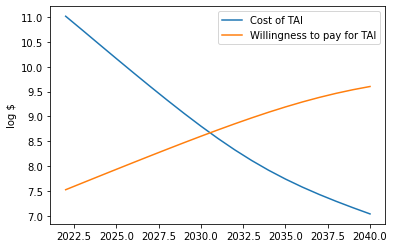

## RUN 17/10000 ##
Diagnostic: tai_flop_size=31.19951906906633, nonscaling_delay=6.287316953257178, algo_doubling_rate=3.403885464579604, possible_algo_reduction=1.9037428574823054, initial_flops_per_dollar=6.253407948023894e+17, flops_halving_rate=3.492866000103165, max_flops_per_dollar=4.205394015188422e+26, initial_pay=9486802.629644368, gdp_growth=1.0110594465978406, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=2.63789514004864
-
It takes 31.2 log FLOPs (~10 nonillion) for transformative capabilities.
Every 3.4 years algorithms get 2x better, with 1.9 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 3.5 years they get 2x cheaper, to a maximum of 26.6 log FLOPs (~100 septillion) per $.
We are willing to pay 7.0 log $ (~one million) and this increases by 2.6x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.011x per year.
In this simulation, there are no willingness ramp effects.
We are willing to spend over 

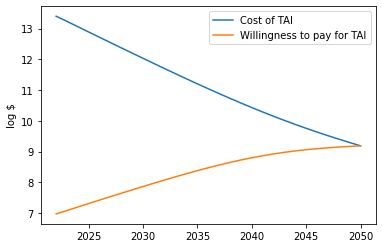

## RUN 18/10000 ##
Diagnostic: tai_flop_size=33.47593819116621, nonscaling_delay=11.920542831133755, algo_doubling_rate=3.8977722998803035, possible_algo_reduction=1.4142749681793225, initial_flops_per_dollar=6.633072081800191e+17, flops_halving_rate=4.436556405576918, max_flops_per_dollar=8.615324508847626e+23, initial_pay=44774052.96655919, gdp_growth=1.0246724704867136, max_gdp_frac=0.0006467362651765985, willingness_ramp=1, spend_doubling_time=0.6278453660466591
-
It takes 33.5 log FLOPs (~one decillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 1.4 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 4.4 years they get 2x cheaper, to a maximum of 23.9 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 0.6x per year to a max of 0.0006% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
We are wi

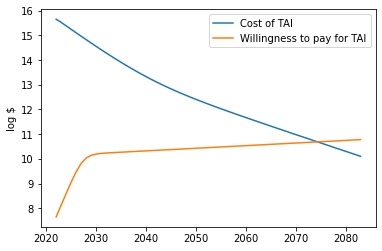

## RUN 19/10000 ##
Diagnostic: tai_flop_size=42.090491583818505, nonscaling_delay=3.0118807732241373, algo_doubling_rate=3.871693070712525, possible_algo_reduction=5.427902341345957, initial_flops_per_dollar=7.213054238963965e+17, flops_halving_rate=3.366507835582549, max_flops_per_dollar=2.3006392526043796e+22, initial_pay=17376634.809147436, gdp_growth=1.0249363015146016, max_gdp_frac=0.0005926280595071135, willingness_ramp=1, spend_doubling_time=1.2990866266951087
-
It takes 42.1 log FLOPs (~one billion decillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 5.4 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per $. Every 3.4 years they get 2x cheaper, to a maximum of 22.4 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.2 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0006% of GDP. GDP grows at a rate of 1.025x per year.
In this simulation, there are no willingness ramp effects.
W

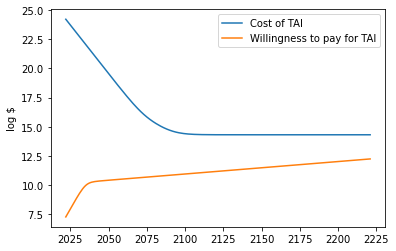

## RUN 20/10000 ##
Diagnostic: tai_flop_size=22.129269599662383, nonscaling_delay=3.0080867454826725, algo_doubling_rate=3.06490876968478, possible_algo_reduction=2.4257461490183325, initial_flops_per_dollar=6.426451211602e+17, flops_halving_rate=5.24363200666331, max_flops_per_dollar=7.745781932169326e+22, initial_pay=19826792.82466193, gdp_growth=1.023868435810333, max_gdp_frac=0.00036553554102236146, willingness_ramp=1, spend_doubling_time=1.5918456075683558
-
It takes 22.1 log FLOPs (~10 sextillion) for transformative capabilities.
Every 3.1 years algorithms get 2x better, with 2.4 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 5.2 years they get 2x cheaper, to a maximum of 22.9 log FLOPs (~10 sextillion) per $.
We are willing to pay 7.3 log $ (~10 million) and this increases by 1.6x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, there are no willingness ramp effects.
We are willing 

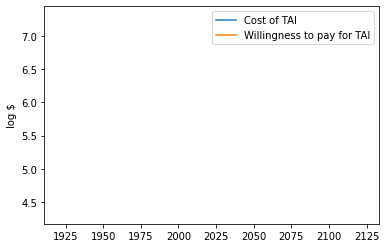

## RUN 21/10000 ##
Diagnostic: tai_flop_size=31.629851236405226, nonscaling_delay=12.170546549897304, algo_doubling_rate=1.5, possible_algo_reduction=2.4399069350175564, initial_flops_per_dollar=8.087743984225852e+17, flops_halving_rate=1.668296471306921, max_flops_per_dollar=2.8332253997197217e+21, initial_pay=58873446.6285937, gdp_growth=1.027348644182149, max_gdp_frac=0.0003645769667567506, willingness_ramp=1, spend_doubling_time=1.670852543419363
-
It takes 31.6 log FLOPs (~10 nonillion) for transformative capabilities.
Every 1.5 years algorithms get 2x better, with 2.4 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per $. Every 1.7 years they get 2x cheaper, to a maximum of 21.5 log FLOPs (~one sextillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 1.7x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.027x per year.
In this simulation, there are no willingness ramp effects.
We are willing to spend ov

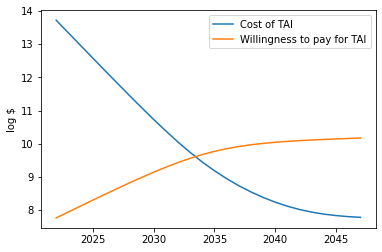

## RUN 22/10000 ##
Diagnostic: tai_flop_size=36.112753862487594, nonscaling_delay=4.2346865944294985, algo_doubling_rate=2.0122503204740108, possible_algo_reduction=3.475407466174768, initial_flops_per_dollar=6.333114355162659e+17, flops_halving_rate=2.1106325998324835, max_flops_per_dollar=2.3399672993669403e+24, initial_pay=23949321.53711153, gdp_growth=1.021485765313726, max_gdp_frac=6e-05, willingness_ramp=1, spend_doubling_time=1.342610284962183
-
It takes 36.1 log FLOPs (~one thousand decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3.5 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.1 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, there are no willingness ramp effects.
We are willing t

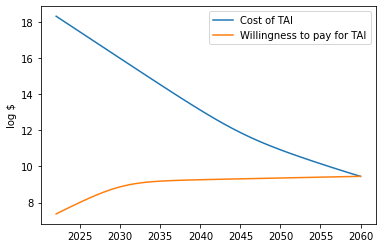

## RUN 23/10000 ##
Diagnostic: tai_flop_size=32.54169145973483, nonscaling_delay=6.275373216727034, algo_doubling_rate=1.8803681343187462, possible_algo_reduction=0.9033909882566016, initial_flops_per_dollar=3.0436332475199e+17, flops_halving_rate=4.084369086734058, max_flops_per_dollar=1.066637807930506e+25, initial_pay=53577292.011605486, gdp_growth=1.0258318631914416, max_gdp_frac=9.567403096474564e-05, willingness_ramp=1, spend_doubling_time=0.5
-
It takes 32.5 log FLOPs (~100 nonillion) for transformative capabilities.
Every 1.9 years algorithms get 2x better, with 0.9 log reductions possible.
FLOPs start at a cost of 17.5 log FLOPs (~100 quadrillion) per $. Every 4.1 years they get 2x cheaper, to a maximum of 25.0 log FLOPs (~10 septillion) per $.
We are willing to pay 7.7 log $ (~10 million) and this increases by 0.5x per year to a max of 0.0001% of GDP. GDP grows at a rate of 1.026x per year.
In this simulation, there are no willingness ramp effects.
We are willing to spend ove

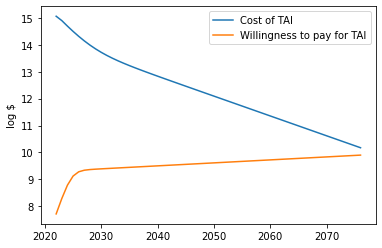

## RUN 24/10000 ##
Diagnostic: tai_flop_size=30.0811247935706, nonscaling_delay=24.79687544894153, algo_doubling_rate=2.2882193078003463, possible_algo_reduction=2.735631343560387, initial_flops_per_dollar=4.685944773450753e+17, flops_halving_rate=2.571963741250259, max_flops_per_dollar=9.488918401813432e+23, initial_pay=27082674.84052387, gdp_growth=1.0176058555244523, max_gdp_frac=0.0004751216920810499, willingness_ramp=1, spend_doubling_time=1.3001871304920434
-
It takes 30.1 log FLOPs (~one nonillion) for transformative capabilities.
Every 2.3 years algorithms get 2x better, with 2.7 log reductions possible.
FLOPs start at a cost of 17.7 log FLOPs (~100 quadrillion) per $. Every 2.6 years they get 2x cheaper, to a maximum of 24.0 log FLOPs (~100 sextillion) per $.
We are willing to pay 7.4 log $ (~10 million) and this increases by 1.3x per year to a max of 0.0005% of GDP. GDP grows at a rate of 1.018x per year.
In this simulation, there are no willingness ramp effects.
We are willi

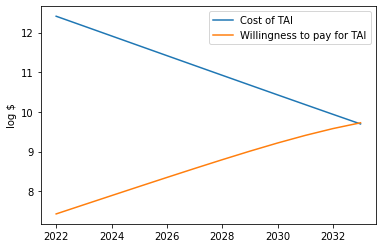

## RUN 25/10000 ##
Diagnostic: tai_flop_size=37.362790163534946, nonscaling_delay=14.838831379461231, algo_doubling_rate=3.471695813624515, possible_algo_reduction=3.1277032395916953, initial_flops_per_dollar=9.82548263381134e+17, flops_halving_rate=3.782070280410868, max_flops_per_dollar=2.465946264781575e+25, initial_pay=41452445.83780259, gdp_growth=1.0227715341904093, max_gdp_frac=0.0003270777356661618, willingness_ramp=1, spend_doubling_time=3.0712906788573733
-
It takes 37.4 log FLOPs (~10 thousand decillion) for transformative capabilities.
Every 3.5 years algorithms get 2x better, with 3.1 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~100 quadrillion) per $. Every 3.8 years they get 2x cheaper, to a maximum of 25.4 log FLOPs (~10 septillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 3.1x per year to a max of 0.0003% of GDP. GDP grows at a rate of 1.023x per year.
In this simulation, there are no willingness ramp effects.
We 

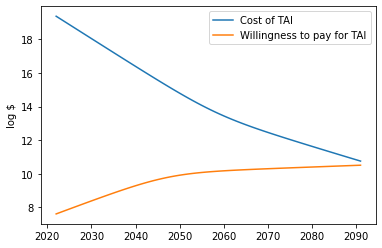

## RUN 26/10000 ##
Diagnostic: tai_flop_size=45.539958637377914, nonscaling_delay=4.240047093599068, algo_doubling_rate=3.800453672318379, possible_algo_reduction=5.362120532522631, initial_flops_per_dollar=5.796284678210908e+17, flops_halving_rate=2.6875872485695496, max_flops_per_dollar=2.60894391572886e+24, initial_pay=63883000.05669113, gdp_growth=1.023927896632983, max_gdp_frac=0.00035746896306907013, willingness_ramp=0.5583527426637714, spend_doubling_time=0.9173363071742316
-
It takes 45.5 log FLOPs (~one trillion decillion) for transformative capabilities.
Every 3.8 years algorithms get 2x better, with 5.4 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 2.7 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per $.
We are willing to pay 7.8 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.024x per year.
In this simulation, if we are 56.0% of the w

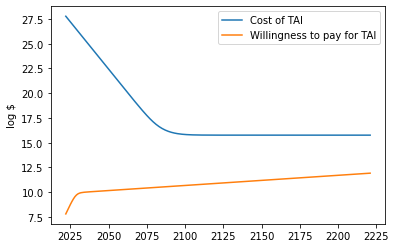

## RUN 27/10000 ##
Diagnostic: tai_flop_size=37.50252966752606, nonscaling_delay=11.208611859860032, algo_doubling_rate=4.693360324297167, possible_algo_reduction=1.435461447427281, initial_flops_per_dollar=1.0058189587634364e+18, flops_halving_rate=3.5300075078650037, max_flops_per_dollar=2.6751807154935243e+24, initial_pay=6628892.8475861875, gdp_growth=1.0171803378723858, max_gdp_frac=0.00016175715796228036, willingness_ramp=1, spend_doubling_time=1.632131082497889
-
It takes 37.5 log FLOPs (~10 thousand decillion) for transformative capabilities.
Every 4.7 years algorithms get 2x better, with 1.4 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~one quintillion) per $. Every 3.5 years they get 2x cheaper, to a maximum of 24.4 log FLOPs (~one septillion) per $.
We are willing to pay 6.8 log $ (~one million) and this increases by 1.6x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.017x per year.
In this simulation, there are no willingness ramp effects

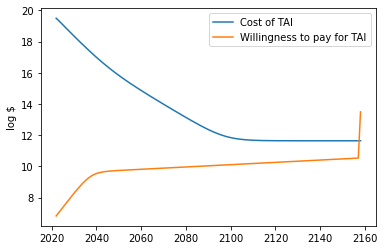

## RUN 28/10000 ##
Diagnostic: tai_flop_size=31.334912133604934, nonscaling_delay=10.515236128170944, algo_doubling_rate=3.9760977896395127, possible_algo_reduction=2.548338976482309, initial_flops_per_dollar=6.117382733400096e+17, flops_halving_rate=3.067175292467252, max_flops_per_dollar=3.0979770178545234e+24, initial_pay=38833653.20068254, gdp_growth=1.0201915663155428, max_gdp_frac=0.00018544672637615974, willingness_ramp=1, spend_doubling_time=0.8709540997539681
-
It takes 31.3 log FLOPs (~10 nonillion) for transformative capabilities.
Every 4.0 years algorithms get 2x better, with 2.5 log reductions possible.
FLOPs start at a cost of 17.8 log FLOPs (~100 quadrillion) per $. Every 3.1 years they get 2x cheaper, to a maximum of 24.5 log FLOPs (~one septillion) per $.
We are willing to pay 7.6 log $ (~10 million) and this increases by 0.9x per year to a max of 0.0002% of GDP. GDP grows at a rate of 1.02x per year.
In this simulation, there are no willingness ramp effects.
We are wi

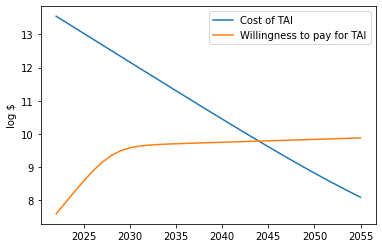

## RUN 29/10000 ##
Diagnostic: tai_flop_size=35.1935307177161, nonscaling_delay=9.365514863549107, algo_doubling_rate=2.4373829279151153, possible_algo_reduction=3.7923801440413163, initial_flops_per_dollar=1.1017938039161857e+18, flops_halving_rate=2.272343058222524, max_flops_per_dollar=1.1515879747465124e+27, initial_pay=148950123.69710016, gdp_growth=1.020524325681098, max_gdp_frac=0.0004147834386511644, willingness_ramp=0.43422713813476443, spend_doubling_time=1.0949160035722287
-
It takes 35.2 log FLOPs (~100 decillion) for transformative capabilities.
Every 2.4 years algorithms get 2x better, with 3.8 log reductions possible.
FLOPs start at a cost of 18.0 log FLOPs (~one quintillion) per $. Every 2.3 years they get 2x cheaper, to a maximum of 27.1 log FLOPs (~one octillion) per $.
We are willing to pay 8.2 log $ (~100 million) and this increases by 1.1x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.021x per year.
In this simulation, if we are 43.0% of the way to 

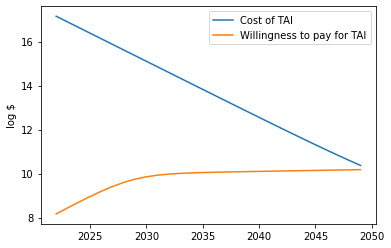

## RUN 30/10000 ##
Diagnostic: tai_flop_size=23.709356139325727, nonscaling_delay=7.778733919138699, algo_doubling_rate=3.8710305655804267, possible_algo_reduction=1.9626636138839428, initial_flops_per_dollar=8.049546292896963e+17, flops_halving_rate=2.0296198486317047, max_flops_per_dollar=1.8336664899626609e+25, initial_pay=5429204.418260979, gdp_growth=1.0299352728511466, max_gdp_frac=0.0003720496681226762, willingness_ramp=0.4660541314044404, spend_doubling_time=0.9200988348030014
-
It takes 23.7 log FLOPs (~100 sextillion) for transformative capabilities.
Every 3.9 years algorithms get 2x better, with 2.0 log reductions possible.
FLOPs start at a cost of 17.9 log FLOPs (~100 quadrillion) per $. Every 2.0 years they get 2x cheaper, to a maximum of 25.3 log FLOPs (~10 septillion) per $.
We are willing to pay 6.7 log $ (~one million) and this increases by 0.9x per year to a max of 0.0004% of GDP. GDP grows at a rate of 1.03x per year.
In this simulation, if we are 47.0% of the way to

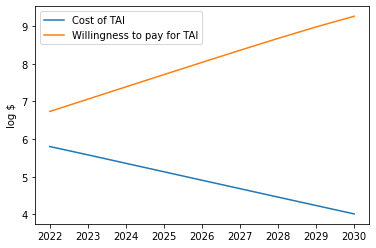

## RUN 101/10000 ##
## RUN 201/10000 ##
## RUN 301/10000 ##
## RUN 401/10000 ##
## RUN 501/10000 ##
## RUN 601/10000 ##
## RUN 701/10000 ##
## RUN 801/10000 ##
## RUN 901/10000 ##
## RUN 1001/10000 ##
## RUN 1101/10000 ##
## RUN 1201/10000 ##
## RUN 1301/10000 ##
## RUN 1401/10000 ##
## RUN 1501/10000 ##
## RUN 1601/10000 ##
## RUN 1701/10000 ##
## RUN 1801/10000 ##
## RUN 1901/10000 ##
## RUN 2001/10000 ##
## RUN 2101/10000 ##
## RUN 2201/10000 ##
## RUN 2301/10000 ##
## RUN 2401/10000 ##
## RUN 2501/10000 ##
## RUN 2601/10000 ##
## RUN 2701/10000 ##
## RUN 2801/10000 ##
## RUN 2901/10000 ##
## RUN 3001/10000 ##
## RUN 3101/10000 ##
## RUN 3201/10000 ##
## RUN 3301/10000 ##
## RUN 3401/10000 ##
## RUN 3501/10000 ##
## RUN 3601/10000 ##
## RUN 3701/10000 ##
## RUN 3801/10000 ##
## RUN 3901/10000 ##
## RUN 4001/10000 ##
## RUN 4101/10000 ##
## RUN 4201/10000 ##
## RUN 4301/10000 ##
## RUN 4401/10000 ##
## RUN 4501/10000 ##
## RUN 4601/10000 ##
## RUN 4701/10000 ##
## RUN 4801/10000 ##
#

In [5000]:
tai_years = []
tai_flop_size_log_ = []
plt.ioff()
print('Running')

for r in range(RUNS):
    print_diagnostic = r < 30
    if print_diagnostic or r % 100 == 0 or r >= RUNS - 1:
        print('## RUN {}/{} ##'.format(r + 1, RUNS))
    if print_diagnostic:
        cost_of_tai_collector = []
        willingness_collector = []
    
    tai_flop_size_ = sample(tai_flop_size)
    if tai_flop_size_ > 300:
        tai_flop_size_ = int(tai_flop_size_) # Handle overflow errors
    tai_flop_size_log_.append(tai_flop_size_)
    
    algo_doubling_rate_ = sample(algo_doubling_rate)
    possible_algo_reduction_ = possible_algo_reduction_fn(sample(min_reduction),
                                                          sample(max_reduction),
                                                          tai_flop_size_)
    initial_flops_per_dollar_ = 10 ** sample(initial_flops_per_dollar)
    flops_halving_rate_ = sample(flops_halving_rate)
    max_flops_per_dollar_ = 10 ** sample(max_flops_per_dollar)
    initial_pay_ = 10 ** sample(initial_pay)
    gdp_growth_ = sample(gdp_growth)
    max_gdp_frac_ = sample(max_gdp_frac)
    
    willingness_ramp_happens = event_occurs(p_willingness_ramp)
    if willingness_ramp_happens:
        willingness_ramp_ = sample(willingness_ramp)
    else:
        willingness_ramp_ = 1
        
    spend_doubling_time_ = sample(spend_doubling_time)
    nonscaling_delay_ = sample(nonscaling_delay)
    initial_chance_of_nonscaling_issue_ = initial_chance_of_nonscaling_issue
    final_chance_of_nonscaling_issue_ = final_chance_of_nonscaling_issue
    queue_tai_year = 99999
    
    if print_diagnostic:
        diagnostic = 'Diagnostic: tai_flop_size={}, nonscaling_delay={}, algo_doubling_rate={}, '
        diagnostic += 'possible_algo_reduction={}, initial_flops_per_dollar={}, flops_halving_rate={}, '
        diagnostic += 'max_flops_per_dollar={}, initial_pay={}, gdp_growth={}, max_gdp_frac={}, '
        diagnostic += 'willingness_ramp={}, spend_doubling_time={}'
        print(diagnostic.format(tai_flop_size_, nonscaling_delay_, algo_doubling_rate_,
                                possible_algo_reduction_, initial_flops_per_dollar_, flops_halving_rate_,
                                max_flops_per_dollar_, initial_pay_, gdp_growth_, max_gdp_frac_,
                                willingness_ramp_, spend_doubling_time_))
        print('-')

        print('It takes {} log FLOPs (~{}) for transformative capabilities.'.format(np.round(tai_flop_size_, 1),
                                                                                    numerize(tai_flop_size_)))
        print('Every {} years algorithms get 2x better, with {} log reductions possible.'.format(np.round(algo_doubling_rate_, 1),
                                                                                                 np.round(possible_algo_reduction_, 1)))
        print(('FLOPs start at a cost of {} log FLOPs (~{}) per $. Every {} years they get ' +
               '2x cheaper, to a maximum of {} log FLOPs (~{}) per $.').format(np.round(math.log10(initial_flops_per_dollar_), 1),
                                                                               numerize(math.log10(initial_flops_per_dollar_)),
                                                                               np.round(flops_halving_rate_, 1),
                                                                               np.round(math.log10(max_flops_per_dollar_), 1),
                                                                               numerize(math.log10(max_flops_per_dollar_))))
        print(('We are willing to pay {} log $ (~{}) and this increases by {}x per year to a max of {}% of GDP. ' +
               'GDP grows at a rate of {}x per year.').format(np.round(math.log10(initial_pay_), 1),
                                                              numerize(math.log10(initial_pay_)),
                                                              np.round(spend_doubling_time_, 1),
                                                              np.round(max_gdp_frac_, 4),
                                                              np.round(gdp_growth_, 3)))
        if willingness_ramp_ < 1:
            print('In this simulation, if we are {}% of the way to paying for TAI, we will ramp to paying for TAI.'.format(np.round(willingness_ramp_ * 100)))
        else:
            print('In this simulation, there are no willingness ramp effects.')
        print('We are willing to spend over {} years to make TAI'.format(willingness_spend_horizon))
            
        print(('If a non-scaling delay happens, it will take an additional {} years to produce TAI due' +
               ' to issues unrelated to scaling FLOP').format(np.round(nonscaling_delay_, 1)))
        print('---')
    
    tai_created = False
    is_nonscaling_issue = None
    recursive = False
    for y in years:
        if not tai_created:
            flops_needed_ = flops_needed(initial_flops=10 ** tai_flop_size_,
                                         doubling_rate=algo_doubling_rate_,
                                         possible_reduction=10 ** possible_algo_reduction_,
                                         year=(y - CURRENT_YEAR))
            #except:
             #   print({'tai_flop_size_': tai_flop_size_, 'doubling_rate': algo_doubling_rate_,
             #          'possible_reduction': possible_algo_reduction_, 'year': (y - CURRENT_YEAR)})
            flops_per_dollar_ = flops_per_dollar(initial_flops_per_dollar=initial_flops_per_dollar_,
                                                 max_flops_per_dollar=max_flops_per_dollar_,
                                                 halving_rate=flops_halving_rate_,
                                                 year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200 or flops_needed_ > 10 ** 200:
                flops_needed_ = int(flops_needed_)
                flops_per_dollar_ = int(flops_per_dollar_)
                cost_of_tai_ = flops_needed_ // flops_per_dollar_
            else:
                cost_of_tai_ = flops_needed_ / flops_per_dollar_
            
            willingness_ = willingness_to_pay(initial_gdp=initial_gdp,
                                              gdp_growth=gdp_growth_,
                                              initial_pay=initial_pay_,
                                              spend_doubling_time=spend_doubling_time_,
                                              max_gdp_frac=max_gdp_frac_,
                                              year=(y - CURRENT_YEAR))
            
            if flops_per_dollar_ > 10 ** 200:
                willingness_ = int(willingness_)
            if willingness_ > 10 ** 200:
                flops_per_dollar_ = int(flops_per_dollar_)
            
            total_compute_ = willingness_ * flops_per_dollar_
            p_recursive = p_rapid_recursive_self_improvement(flops_needed_,
                                                             total_compute_,
                                                             base_p_recursive,
                                                             recursive_curve_steepness,
                                                             recursive_curve_inflection)
            p_recursive = p_recursive / 8 # Attempt to turn CDF into PDF (approximation)
            
            cost_of_tai_collector.append(cost_of_tai_)
            willingness_collector.append(willingness_)
            
            if print_diagnostic:
                out_str = ('Year: {} - {} max log FLOP ({}) available - TAI takes {} log FLOP ({}) - ' +
                           'log $ {} to buy TAI ({}) vs. willingness to pay log $ {} ({}) - {} log FLOPS per $ ({})')
                print(out_str.format(y,
                                     np.round(math.log10(total_compute_), 1),
                                     numerize(math.log10(total_compute_)),
                                     np.round(math.log10(flops_needed_), 1),
                                     numerize(math.log10(flops_needed_)),
                                     np.round(math.log10(cost_of_tai_), 1),
                                     numerize(math.log10(cost_of_tai_)),
                                     np.round(math.log10(willingness_), 1),
                                     numerize(math.log10(willingness_)),
                                     np.round(math.log10(flops_per_dollar_), 1),
                                     numerize(math.log10(flops_per_dollar_))))
            
            if cost_of_tai_ > 10 ** 200:
                spend_tai_years = int(cost_of_tai_) // int(willingness_)
            else:
                spend_tai_years = cost_of_tai_ / willingness_
                
            if queue_tai_year < 99999 and print_diagnostic:
                print('-$- {}/{}'.format(y, queue_tai_year))
            if (cost_of_tai_ * willingness_ramp_ <= willingness_) or y >= queue_tai_year:
                if is_nonscaling_issue is None:
                    p_nonscaling_delay_ = p_nonscaling_delay(initial_chance_of_nonscaling_issue,
                                                             final_chance_of_nonscaling_issue,
                                                             year=y,
                                                             max_year=nonscaling_issue_bottom_year)
                    r_ = random.random()
                    is_nonscaling_issue = r_ < p_nonscaling_delay_
                    nonscaling_countdown = nonscaling_delay_
                    if print_diagnostic:
                        print('-- {} p_nonscaling_issue={} r_={}'.format('Nonscaling delay occured' if is_nonscaling_issue else 'Nonscaling issue did not occur',
                                                                         np.round(p_nonscaling_delay_, 4),
                                                                         np.round(r_, 4)))
                
                if not is_nonscaling_issue or nonscaling_countdown <= 0.1:
                    if print_diagnostic:
                        print('--- /!\ TAI CREATED in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                else:
                    if print_diagnostic:
                        print('/!\ FLOPs for TAI sufficient but needs {} more years to solve non-scaling issues'.format(np.round(nonscaling_countdown, 1)))
                    nonscaling_countdown -= 1
            elif willingness_spend_horizon > 1 and spend_tai_years <= willingness_spend_horizon and y + math.ceil(spend_tai_years) < queue_tai_year:
                queue_tai_year = y + math.ceil(spend_tai_years)
                if print_diagnostic:
                    print('-$- We have enough spend to make TAI in {} years (in {}) if sustained.'.format(math.ceil(spend_tai_years),
                                                                                                          queue_tai_year))
                
            
            
            r_ = random.random()
            if not tai_created and not is_nonscaling_issue and not recursive and r_ < p_recursive:
                flops_halving_rate__ = sample(recursive_flops_halving_rate)
                flops_halving_rate_ = flops_halving_rate__ if flops_halving_rate__ < flops_halving_rate_ else flops_halving_rate_
                algo_doubling_rate__ = sample(recursive_algo_doubling_rate)
                algo_doubling_rate_ = algo_doubling_rate__ if algo_doubling_rate__ < algo_doubling_rate_ else algo_doubling_rate_
                spend_doubling_time__ = sample(recursive_spend_doubling_time)
                spend_doubling_time_ = spend_doubling_time__ if spend_doubling_time__ < spend_doubling_time_ else spend_doubling_time_
                gdp_growth__ = sample(recursive_gdp_growth)
                gdp_growth_ = gdp_growth__ if gdp_growth__ > gdp_growth_ else gdp_growth_
                initial_chance_of_nonscaling_issue_ = recursive_initial_chance_of_nonscaling_issue
                final_chance_of_nonscaling_issue_ = recursive_final_chance_of_nonscaling_issue
                recursive = True
                # TODO: fix issue where this changes the variables as of 2022 rather than as of the time of the rapid recursion

                if print_diagnostic:
                    print(('--- rapid recursive loop (ratio={} p={}, r_={}) - set flops_having_rate={}, ' +
                           'algo_doubling_rate={} spend_doubling_time={}, gdp_growth={}, initial_chance_of_nonscaling_issue={} ' +
                           'final_chance_of_nonscaling_issue={}').format(total_compute_ / flops_needed_,
                                                                         p_recursive,
                                                                         r_,
                                                                         flops_halving_rate_,
                                                                         algo_doubling_rate_,
                                                                         spend_doubling_time_,
                                                                         gdp_growth_,
                                                                         initial_chance_of_nonscaling_issue,
                                                                         final_chance_of_nonscaling_issue))
                if event_occurs(p_recursive_creates_tai_instantly):
                    if print_diagnostic:
                        print('--- /!\ RRSI LOOP CREATES TAI in {}'.format(y))
                        plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
                    tai_years.append(y)
                    tai_created = True
                        
            elif not tai_created and not is_nonscaling_issue and not recursive and print_diagnostic:
                print('--- no rapid recursive loop (ratio={}, p={}, r_={})'.format(round(total_compute_ / flops_needed_, 3),
                                                                                   p_recursive,
                                                                                   r_))
                
    if not tai_created:
        if print_diagnostic:
            print('--- :/ TAI NOT CREATED BEFORE {}'.format(MAX_YEAR + 1))
            plot_tai(plt, years, cost_of_tai_collector, willingness_collector).show()
        tai_years.append(MAX_YEAR + 1)


In [5001]:
out = get_percentiles(tai_years)
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out.items()]

# NOTE: Ajeya's numbers should output something very close to:
# '5%': 2027,
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2047',
# '50%: 2053',
# '60%: 2061',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

# My latest numbers (2022 Aug 5 12:42AM CT):
#['5%: 2028',
# '10%: 2031',
# '20%: 2037',
# '30%: 2042',
# '40%: 2048',
# '50%: 2054',
# '60%: 2061',
# '70%: 2070',
# '80%: 2086',
# '90%: 2145',
# '95%: >2222']


['5%: 2028',
 '10%: 2031',
 '20%: 2037',
 '30%: 2042',
 '40%: 2048',
 '50%: 2054',
 '60%: 2061',
 '70%: 2070',
 '80%: 2086',
 '90%: 2145',
 '95%: >2222']

In [5002]:
[str(o[0]) + '%: ' + (str(int(o[1]) - CURRENT_YEAR) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR - CURRENT_YEAR)) + ' years from now' for o in out.items()]


['5%: 6 years from now',
 '10%: 9 years from now',
 '20%: 15 years from now',
 '30%: 20 years from now',
 '40%: 26 years from now',
 '50%: 32 years from now',
 '60%: 39 years from now',
 '70%: 48 years from now',
 '80%: 64 years from now',
 '90%: 123 years from now',
 '95%: >200 years from now']

In [5003]:
def print_chance_tai_by_year(data, year_target):
    return '{}% chance of TAI by EOY {}'.format(int(np.round(sum([1 if y <= year_target else 0 for y in data]) / len(data) * 100, 0)),
                                                year_target)
    
print('## Within <2 years')
print_chance_tai_by_year(tai_years, 2023)


## Within <2 years


'1% chance of TAI by EOY 2023'

In [5004]:
print_chance_tai_by_year(tai_years, 2024)

'1% chance of TAI by EOY 2024'

In [5005]:
print_chance_tai_by_year(tai_years, 2025)

'2% chance of TAI by EOY 2025'

In [5006]:
print('## Within 5 years')
print_chance_tai_by_year(tai_years, 2027)

## Within 5 years


'4% chance of TAI by EOY 2027'

In [5007]:
print_chance_tai_by_year(tai_years, 2029)

'7% chance of TAI by EOY 2029'

In [5008]:
print_chance_tai_by_year(tai_years, 2030)

'9% chance of TAI by EOY 2030'

In [5009]:
print('## Within 10 years')
print_chance_tai_by_year(tai_years, 2032)

## Within 10 years


'12% chance of TAI by EOY 2032'

In [5010]:
# Holden benchmarks from https://www.cold-takes.com/biological-anchors-is-about-bounding-not-pinpointing-ai-timelines/#bio-anchors-as-a-way-of-bounding-ai-timelines
print('## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)')
print_chance_tai_by_year(tai_years, 2036)


## Within 14 years (Holden benchmark - 10%-50%, Holden: 10%)


'20% chance of TAI by EOY 2036'

In [5011]:
print('## Within 15 years')
print_chance_tai_by_year(tai_years, 2037)

## Within 15 years


'22% chance of TAI by EOY 2037'

In [5012]:
print_chance_tai_by_year(tai_years, 2040)

'27% chance of TAI by EOY 2040'

In [5013]:
print('## Within 20 years')
print_chance_tai_by_year(tai_years, 2042)

## Within 20 years


'31% chance of TAI by EOY 2042'

In [5014]:
print('## Within 25 years')
print_chance_tai_by_year(tai_years, 2047)

## Within 25 years


'40% chance of TAI by EOY 2047'

In [5015]:
print_chance_tai_by_year(tai_years, 2050)

'45% chance of TAI by EOY 2050'

In [5016]:
print_chance_tai_by_year(tai_years, 2060)

'60% chance of TAI by EOY 2060'

In [5017]:
print('## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)')
print_chance_tai_by_year(tai_years, 2060)

## Within 38 years (Holden benchmark - 25%-75%, Holden: 50%)


'60% chance of TAI by EOY 2060'

In [5018]:
print('## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)')
print_chance_tai_by_year(tai_years, 2070)

## Within 48 years (Carlsmith benchmark - Carlsmith: 50%)


'70% chance of TAI by EOY 2070'

In [5019]:
print('## Within 50 years')
print_chance_tai_by_year(tai_years, 2072)

## Within 50 years


'72% chance of TAI by EOY 2072'

In [5020]:
print('## Within my personal expected lifespan')
print_chance_tai_by_year(tai_years, 2078)

## Within my personal expected lifespan


'76% chance of TAI by EOY 2078'

In [5021]:
print('## Within 75 years')
print_chance_tai_by_year(tai_years, 2097)

## Within 75 years


'84% chance of TAI by EOY 2097'

In [5022]:
print('## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)')
print_chance_tai_by_year(tai_years, 2100)

## Within 78 years (Holden benchmark - 33%-90%, Holden: 66%)


'85% chance of TAI by EOY 2100'

In [5023]:
print('## Within 100 years')
print_chance_tai_by_year(tai_years, 2122)

## Within 100 years


'88% chance of TAI by EOY 2122'

In [5024]:
print('## Within 200 years')
print_chance_tai_by_year(tai_years, 2222)

## Within 200 years


'93% chance of TAI by EOY 2222'

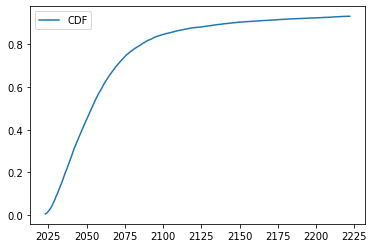

In [5025]:
tai_years_ = np.array([MAX_YEAR + 1 if t > MAX_YEAR else t for t in tai_years])
count, bins_count = np.histogram(tai_years_, bins=(MAX_YEAR - CURRENT_YEAR))
pdf = count / sum(count)
cdf = np.cumsum(pdf)
bins = np.round(np.array([b for b in bins_count[1:] if b <= MAX_YEAR]))

plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

<string>:207: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:208: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

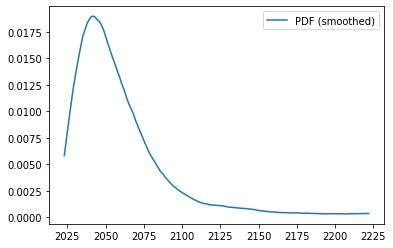

In [5026]:
pdf_smoothed = savitzky_golay(pdf[:len(bins)], 51, 3) # window size 51, polynomial order 3
plt.plot(bins, pdf_smoothed, label='PDF (smoothed)')
plt.legend()
plt.show()

In [5027]:
cdf[:len(bins)]

array([0.006 , 0.0099, 0.0183, 0.027 , 0.0387, 0.0531, 0.0689, 0.0869,
       0.1028, 0.1205, 0.1396, 0.1562, 0.1767, 0.1981, 0.215 , 0.2337,
       0.2535, 0.2738, 0.2942, 0.3144, 0.3315, 0.3479, 0.366 , 0.3825,
       0.3992, 0.416 , 0.4318, 0.4481, 0.464 , 0.4788, 0.4948, 0.5116,
       0.5279, 0.5428, 0.5574, 0.5711, 0.5829, 0.5955, 0.6097, 0.622 ,
       0.6326, 0.6443, 0.655 , 0.6649, 0.6743, 0.6837, 0.6943, 0.7026,
       0.7104, 0.719 , 0.7266, 0.7347, 0.7423, 0.7497, 0.755 , 0.7615,
       0.7667, 0.7725, 0.7778, 0.7824, 0.7876, 0.7914, 0.7951, 0.8004,
       0.8053, 0.809 , 0.8138, 0.8179, 0.8205, 0.8234, 0.8272, 0.831 ,
       0.8345, 0.8367, 0.8395, 0.8418, 0.8436, 0.846 , 0.8476, 0.8502,
       0.8512, 0.8532, 0.8554, 0.8574, 0.8588, 0.8607, 0.8626, 0.8641,
       0.8656, 0.8669, 0.8686, 0.8699, 0.8714, 0.8725, 0.8744, 0.8752,
       0.8764, 0.8777, 0.8785, 0.8791, 0.8801, 0.881 , 0.8822, 0.8837,
       0.8844, 0.8854, 0.8863, 0.8874, 0.8885, 0.8894, 0.8909, 0.8915,
      

In [5028]:
pdf[:len(bins)]

array([0.006 , 0.0039, 0.0084, 0.0087, 0.0117, 0.0144, 0.0158, 0.018 ,
       0.0159, 0.0177, 0.0191, 0.0166, 0.0205, 0.0214, 0.0169, 0.0187,
       0.0198, 0.0203, 0.0204, 0.0202, 0.0171, 0.0164, 0.0181, 0.0165,
       0.0167, 0.0168, 0.0158, 0.0163, 0.0159, 0.0148, 0.016 , 0.0168,
       0.0163, 0.0149, 0.0146, 0.0137, 0.0118, 0.0126, 0.0142, 0.0123,
       0.0106, 0.0117, 0.0107, 0.0099, 0.0094, 0.0094, 0.0106, 0.0083,
       0.0078, 0.0086, 0.0076, 0.0081, 0.0076, 0.0074, 0.0053, 0.0065,
       0.0052, 0.0058, 0.0053, 0.0046, 0.0052, 0.0038, 0.0037, 0.0053,
       0.0049, 0.0037, 0.0048, 0.0041, 0.0026, 0.0029, 0.0038, 0.0038,
       0.0035, 0.0022, 0.0028, 0.0023, 0.0018, 0.0024, 0.0016, 0.0026,
       0.001 , 0.002 , 0.0022, 0.002 , 0.0014, 0.0019, 0.0019, 0.0015,
       0.0015, 0.0013, 0.0017, 0.0013, 0.0015, 0.0011, 0.0019, 0.0008,
       0.0012, 0.0013, 0.0008, 0.0006, 0.001 , 0.0009, 0.0012, 0.0015,
       0.0007, 0.001 , 0.0009, 0.0011, 0.0011, 0.0009, 0.0015, 0.0006,
      

<string>:207: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:208: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

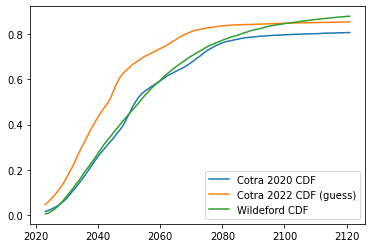

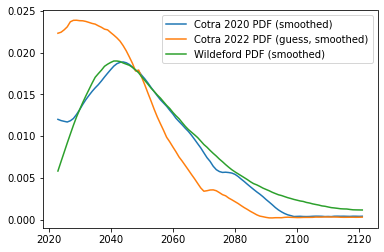

In [5030]:
cotra_2020_cdf = [0.0171, 0.0212, 0.0275, 0.0343, 0.0416, 0.0521, 0.0636, 0.0764,
       0.093 , 0.11  , 0.1262, 0.1436, 0.1607, 0.1809, 0.2012, 0.2209,
       0.2413, 0.2597, 0.2775, 0.2935, 0.3105, 0.3257, 0.3413, 0.3607,
       0.3756, 0.3955, 0.421 , 0.4474, 0.4759, 0.4996, 0.52  , 0.5356,
       0.5473, 0.5567, 0.5664, 0.5753, 0.5845, 0.5936, 0.6032, 0.613 ,
       0.6207, 0.6277, 0.6351, 0.6422, 0.6483, 0.6562, 0.6651, 0.6741,
       0.6842, 0.695 , 0.7044, 0.7163, 0.7264, 0.7342, 0.7419, 0.749 ,
       0.7556, 0.7611, 0.7655, 0.7688, 0.7713, 0.7747, 0.777 , 0.7806,
       0.7827, 0.7842, 0.7858, 0.7868, 0.7882, 0.7903, 0.7909, 0.7917,
       0.793 , 0.794 , 0.7946, 0.7953, 0.7957, 0.7968, 0.797 , 0.7977,
       0.7986, 0.7992, 0.7994, 0.7999, 0.8004, 0.8007, 0.8012, 0.8016,
       0.8019, 0.8028, 0.8036, 0.8037, 0.8044, 0.8046, 0.8051, 0.8054,
       0.806 , 0.8064, 0.8064, 0.8068, 0.8073, 0.8079, 0.8082, 0.8083,
       0.8085, 0.8091, 0.8095, 0.8099, 0.8104, 0.8111, 0.8114, 0.8119,
       0.8122, 0.8127, 0.8129, 0.8132, 0.8136, 0.8137, 0.8139, 0.8145,
       0.815 , 0.815 , 0.8154, 0.8157, 0.816 , 0.8165, 0.8169, 0.8172,
       0.8173, 0.8179, 0.8184, 0.8186, 0.8197, 0.8208, 0.8211, 0.8214,
       0.8221, 0.8224, 0.8228, 0.823 , 0.8241, 0.8249, 0.8258, 0.8271,
       0.8274, 0.828 , 0.8284, 0.8292, 0.83  , 0.8306, 0.8309, 0.8313,
       0.8314, 0.8318, 0.8324, 0.8327, 0.833 , 0.8337, 0.8338, 0.8339,
       0.8343, 0.8352, 0.8359, 0.8368, 0.8376, 0.8381, 0.8383, 0.8387,
       0.8391, 0.8394, 0.84  , 0.8406, 0.8412, 0.8416, 0.842 , 0.8424,
       0.8431, 0.8438, 0.8446, 0.8453, 0.8457, 0.8463, 0.8466, 0.8471,
       0.8478, 0.8482, 0.849 , 0.8495, 0.8501, 0.8506, 0.8509, 0.8517,
       0.8522, 0.8525, 0.8529, 0.8534, 0.8538, 0.8542, 0.8547]
cotra_2020_pdf = np.append(np.array(cotra_2020_cdf[0]), np.diff(cotra_2020_cdf[:len(bins)]))
cotra_2020_pdf_smoothed = savitzky_golay(cotra_2020_pdf[:len(bins)], 51, 3)

cotra_2022_cdf = [0.0472, 0.0597, 0.0742, 0.0885, 0.1061, 0.1236, 0.1456, 0.1705,
       0.1962, 0.2203, 0.2522, 0.2808, 0.3085, 0.3336, 0.3619, 0.3871,
       0.4112, 0.4339, 0.4556, 0.4748, 0.4939, 0.5166, 0.5512, 0.5824,
       0.6077, 0.6263, 0.6393, 0.651 , 0.6649, 0.6735, 0.6835, 0.6928,
       0.7012, 0.7077, 0.7147, 0.7221, 0.7288, 0.7359, 0.7424, 0.7496,
       0.7589, 0.767 , 0.7752, 0.7838, 0.7922, 0.7988, 0.8043, 0.8107,
       0.8153, 0.8183, 0.8212, 0.8239, 0.8264, 0.8288, 0.8307, 0.8325,
       0.8339, 0.836 , 0.8371, 0.8383, 0.8398, 0.8403, 0.841 , 0.8413,
       0.8417, 0.842 , 0.8421, 0.8425, 0.8433, 0.8437, 0.8439, 0.8446,
       0.8452, 0.8456, 0.846 , 0.8465, 0.847 , 0.8473, 0.8479, 0.8482,
       0.8486, 0.8487, 0.8493, 0.8496, 0.8496, 0.8499, 0.85  , 0.8505,
       0.8508, 0.8513, 0.8513, 0.8514, 0.8516, 0.8522, 0.8525, 0.8528,
       0.8531, 0.8534, 0.8536, 0.8538, 0.8541, 0.8545, 0.8553, 0.8556,
       0.8556, 0.8558, 0.8562, 0.8562, 0.8563, 0.8567, 0.8572, 0.8575,
       0.858 , 0.8584, 0.8587, 0.8591, 0.8598, 0.86  , 0.8601, 0.8605,
       0.8607, 0.861 , 0.8613, 0.8613, 0.8614, 0.8616, 0.8617, 0.862 ,
       0.8621, 0.8623, 0.8625, 0.8629, 0.8637, 0.864 , 0.8647, 0.8651,
       0.8652, 0.8655, 0.8658, 0.8664, 0.8672, 0.8681, 0.8687, 0.8693,
       0.8697, 0.8703, 0.8706, 0.8711, 0.8716, 0.872 , 0.8725, 0.873 ,
       0.8735, 0.8742, 0.8748, 0.8751, 0.8757, 0.8759, 0.8768, 0.8771,
       0.8779, 0.8783, 0.8787, 0.879 , 0.8794, 0.8797, 0.8802, 0.8806,
       0.8809, 0.8809, 0.8809, 0.8814, 0.8818, 0.8822, 0.8829, 0.8833,
       0.884 , 0.8845, 0.8848, 0.8856, 0.8858, 0.8864, 0.8868, 0.8868,
       0.887 , 0.8873, 0.888 , 0.8885, 0.8892, 0.8894, 0.8898, 0.8905,
       0.891 , 0.8914, 0.8918, 0.8923, 0.8926, 0.8929, 0.8933]
cotra_2022_pdf = np.append(np.array(cotra_2022_cdf[0]), np.diff(cotra_2022_cdf[:len(bins)]))
cotra_2022_pdf_smoothed = savitzky_golay(cotra_2022_pdf[:len(bins)], 51, 3)

peter_cdf = [0.006 , 0.0099, 0.0183, 0.027 , 0.0387, 0.0531, 0.0689, 0.0869,
       0.1028, 0.1205, 0.1396, 0.1562, 0.1767, 0.1981, 0.215 , 0.2337,
       0.2535, 0.2738, 0.2942, 0.3144, 0.3315, 0.3479, 0.366 , 0.3825,
       0.3992, 0.416 , 0.4318, 0.4481, 0.464 , 0.4788, 0.4948, 0.5116,
       0.5279, 0.5428, 0.5574, 0.5711, 0.5829, 0.5955, 0.6097, 0.622 ,
       0.6326, 0.6443, 0.655 , 0.6649, 0.6743, 0.6837, 0.6943, 0.7026,
       0.7104, 0.719 , 0.7266, 0.7347, 0.7423, 0.7497, 0.755 , 0.7615,
       0.7667, 0.7725, 0.7778, 0.7824, 0.7876, 0.7914, 0.7951, 0.8004,
       0.8053, 0.809 , 0.8138, 0.8179, 0.8205, 0.8234, 0.8272, 0.831 ,
       0.8345, 0.8367, 0.8395, 0.8418, 0.8436, 0.846 , 0.8476, 0.8502,
       0.8512, 0.8532, 0.8554, 0.8574, 0.8588, 0.8607, 0.8626, 0.8641,
       0.8656, 0.8669, 0.8686, 0.8699, 0.8714, 0.8725, 0.8744, 0.8752,
       0.8764, 0.8777, 0.8785, 0.8791, 0.8801, 0.881 , 0.8822, 0.8837,
       0.8844, 0.8854, 0.8863, 0.8874, 0.8885, 0.8894, 0.8909, 0.8915,
       0.8922, 0.8927, 0.8938, 0.8952, 0.896 , 0.8972, 0.8977, 0.8983,
       0.899 , 0.8997, 0.9006, 0.9015, 0.9022, 0.903 , 0.9035, 0.904 ,
       0.9041, 0.9047, 0.9058, 0.9064, 0.907 , 0.9072, 0.9079, 0.9083,
       0.909 , 0.9093, 0.9098, 0.9103, 0.9106, 0.911 , 0.9112, 0.9114,
       0.9118, 0.9123, 0.9127, 0.9131, 0.9138, 0.9143, 0.9145, 0.915 ,
       0.9155, 0.9159, 0.9164, 0.9171, 0.9173, 0.9175, 0.9181, 0.9185,
       0.919 , 0.9192, 0.9194, 0.9199, 0.9201, 0.9203, 0.9207, 0.9209,
       0.9213, 0.9217, 0.9219, 0.9223, 0.9225, 0.923 , 0.9231, 0.9234,
       0.9241, 0.9241, 0.9242, 0.9248, 0.925 , 0.9255, 0.9257, 0.9258,
       0.9261, 0.9265, 0.9271, 0.9275, 0.9279, 0.9287, 0.9288, 0.9291,
       0.9294, 0.93  , 0.9303, 0.9306, 0.9308, 0.931 , 0.9312]
peter_pdf = np.append(np.array(peter_cdf[0]), np.diff(peter_cdf[:len(bins)]))
peter_pdf_smoothed = savitzky_golay(peter_pdf[:len(bins)], 51, 3)

plt.plot(bins[:99], cotra_2020_cdf[:99], label='Cotra 2020 CDF')
plt.plot(bins[:99], cotra_2022_cdf[:99], label='Cotra 2022 CDF (guess)')
plt.plot(bins[:99], peter_cdf[:99], label='Wildeford CDF')
plt.legend()
plt.show()

plt.plot(bins[:99], cotra_2020_pdf_smoothed[:99], label='Cotra 2020 PDF (smoothed)')
plt.plot(bins[:99], cotra_2022_pdf_smoothed[:99], label='Cotra 2022 PDF (guess, smoothed)')
plt.plot(bins[:99], peter_pdf_smoothed[:99], label='Wildeford PDF (smoothed)')
plt.legend()
plt.show()